# Background & Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

# Data Dictionary 

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

# EDA

## View the dataset

In [2]:
df = pd.read_csv("Loan_Modelling.csv")
data = df.copy() # let us make another copy of data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 5000 rows and 14 columns.


In [3]:
data.head(10) # Exploring initial 10 rows of the data set

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
np.random.seed(42)  # To get the same random results every time
data.sample(n=20)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1501,1502,30,4,35,92130,2,0.3,2,0,0,1,0,0,1
2586,2587,47,23,149,92675,4,6.1,1,0,1,0,0,0,1
2653,2654,30,5,121,94555,2,3.1,1,408,0,0,0,1,0
1055,1056,31,6,62,95630,1,1.0,1,0,0,1,0,1,0
705,706,62,36,30,94720,3,0.7,2,0,0,0,0,1,0
106,107,43,17,69,92717,4,2.9,1,0,0,0,0,1,1
589,590,31,7,128,92821,1,6.0,1,0,0,0,0,0,0
2468,2469,49,23,133,94304,1,7.3,1,0,0,0,0,1,1
2413,2414,60,34,31,91007,2,1.0,3,0,0,0,0,0,0
1600,1601,60,36,129,92028,2,6.0,1,0,0,0,0,1,0


In [5]:
np.random.seed(1)  # To get the same random results every time
data.sample(n=20)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.90,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.90,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.30,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.30,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.60,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.50,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.60,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.20,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.80,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.00,3,0,0,0,0,0,1


In [6]:
data.tail(10) # Exploring last 10 rows of the data set

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data.drop(["ID"],axis=1,inplace=True) # Remove ID column and use python #no. ; inplace means no make copy
# data.drop(['Mortgage'],axis=1,inplace=True)

In [9]:
data["ZIPCode"] = data["ZIPCode"].astype("category")
data["Family"] = data["Family"].astype("category")
data["Education"] = data["Education"].astype("category")
data["Personal_Loan"] = data["Personal_Loan"].astype("category")
data["Securities_Account"] = data["Securities_Account"].astype("category")
data["CD_Account"] = data["CD_Account"].astype("category")
data["Online"] = data["Online"].astype("category")
data["CreditCard"] = data["CreditCard"].astype("category")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 263.8 KB


In [11]:
# Check the unique values in each column of the dataframe.
data.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [12]:
data.isnull().values.any() # If there are any null or missing values in data set; 

# Pandas will recognize both empty cells and “NA” types as missing values
# To detect NaN values numpy uses np.isnan().
# To detect NaN values pandas uses either .isna() or .isnull().
# The NaN values are inherited from the fact that pandas is built on top of numpy, 
# while the two functions' names originate from R's DataFrames, whose structure and functionality pandas tried to mimic.

False

- There are no missing values.

In [13]:
data[data.duplicated()].count() # Find out duplicates in the data set

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no duplicate entries.

In [14]:
data.describe(include='all').T # View summary of dataset

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,467.0,94720.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family,5000.0,4.0,1.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,3.0,1.0,2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,2.0,0.0,4520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,5000.0,2.0,0.0,4478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

* Mean value for the age column is approx 45 and median is 45. This shows that the customers distribution is normal.
* Mean work experience is approx 20 years and median is 20 years. This shows that the customers distribution is normal.
* Mean income of customers is approx 73K and median is 64K. This shows that more customers have an income under 73K.
* Mean no. of Family members is approx. 2.4 and median is 2.0. This shows more customers have family size of 2 and below.
* Mean Average spending on credit cards per month is approx 2K and median is 1.5K. This shows customers usually spend under 2K per month on credit cards.
* Mean Number of Mortgage is approx 56.5K and median is 0, this requires further investigation. A quick look of dataset shows most customers don't take a mortgage.
* Most customers do not have personal loan, securities account, CD account with the bank.
* Over half of the customers use online banking facilities and about 70% of the customers do not use other bank's credit card.

## Univariate Analysis

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

### Observations on Age (Start of Numerical Variables Analysis)

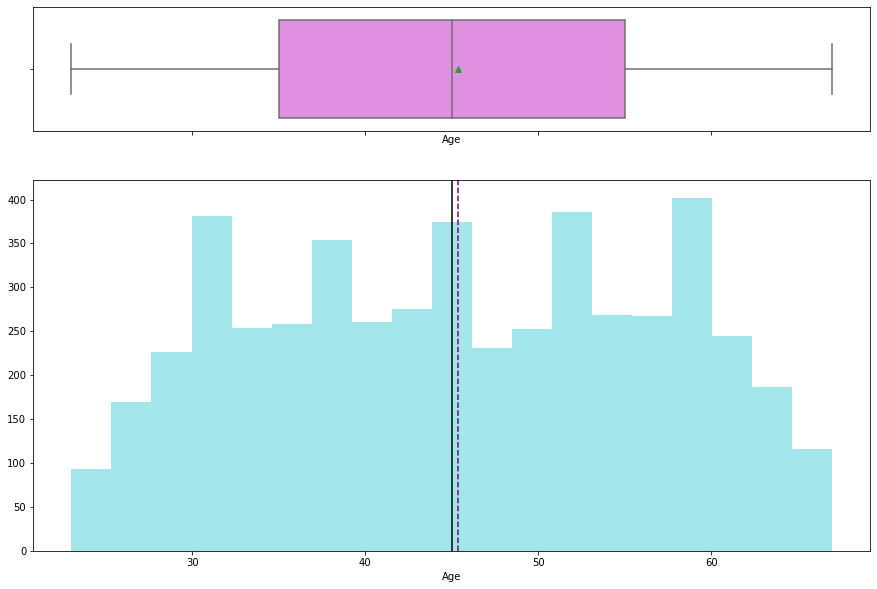

In [17]:
histogram_boxplot(data["Age"])

- The distribution of age is normal
- The boxplot shows that there are no outliers

### Observations on Experience 

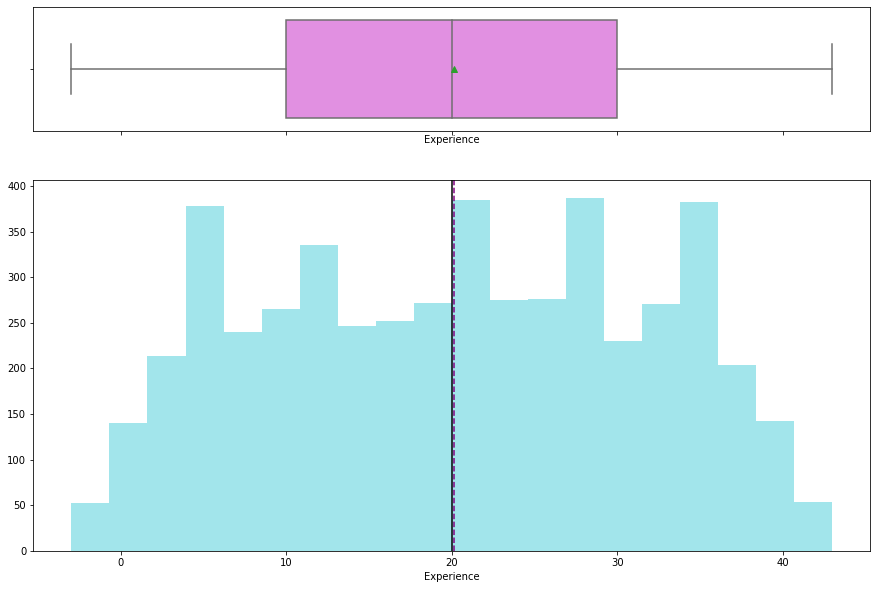

In [18]:
histogram_boxplot(data["Experience"])

- The distribution of Experience is normal
- The boxplot shows that there are no outliers

### Observations on Income 

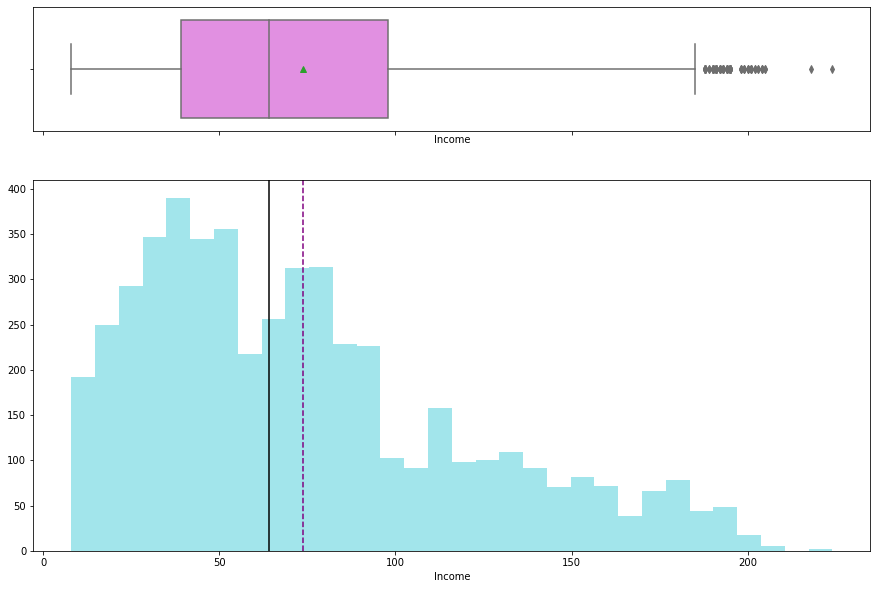

In [19]:
histogram_boxplot(data["Income"])

- The distribution of Income is right skewed
- The boxplot shows outliers to the higher end of the income band
- We will not treat these outliers as they represent the real market trend

### Observations on Average spending on credit cards

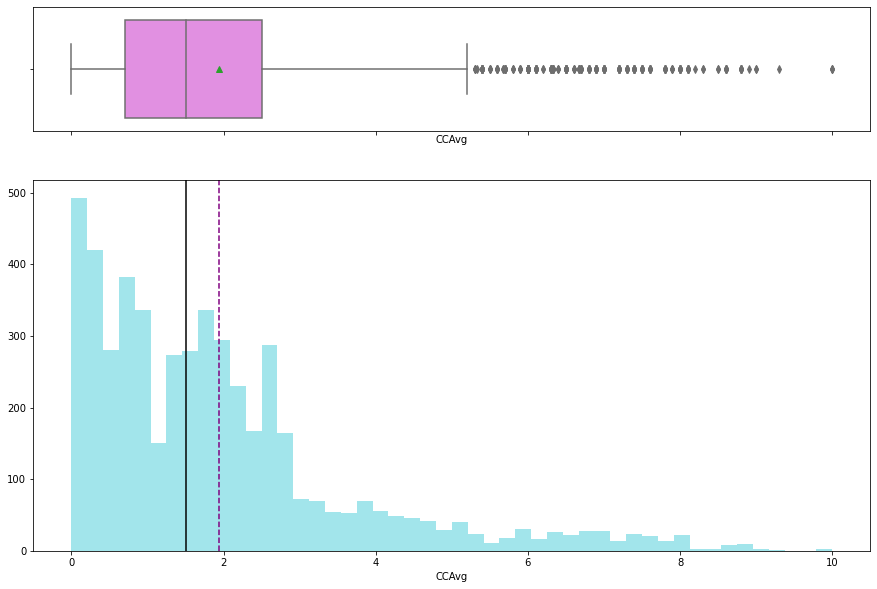

In [20]:
histogram_boxplot(data["CCAvg"])

- The distribution of Average spending on credit cards per month is right skewed
- The boxplot shows outliers to the higher end of the credit card spending
- We will not treat these outliers as they represent the real market trend

### Observations on Mortgage value

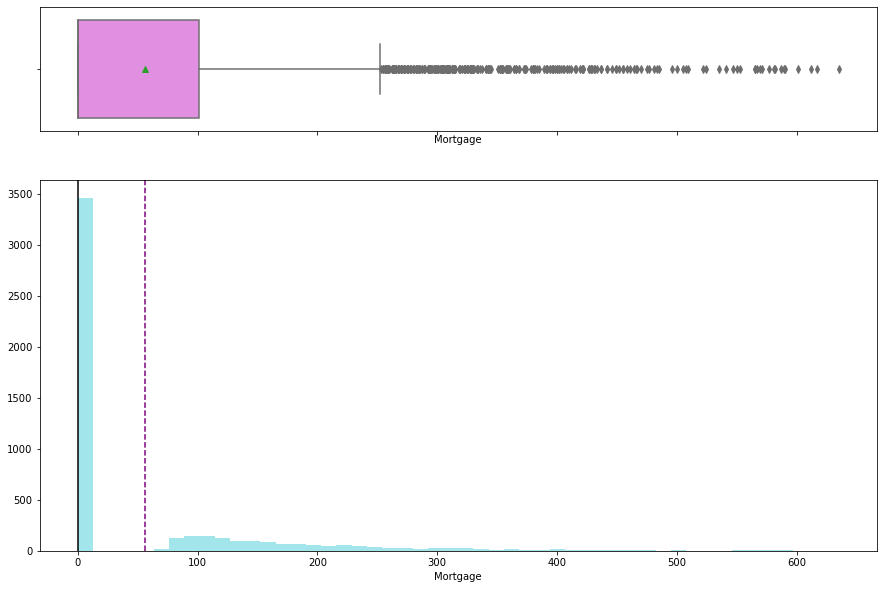

In [21]:
histogram_boxplot(data["Mortgage"])

- Minority of customers took a mortgage with ranges from 60 to 600K.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 263.8 KB


In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Zipcode( Start of Categorical Variables Analysis)

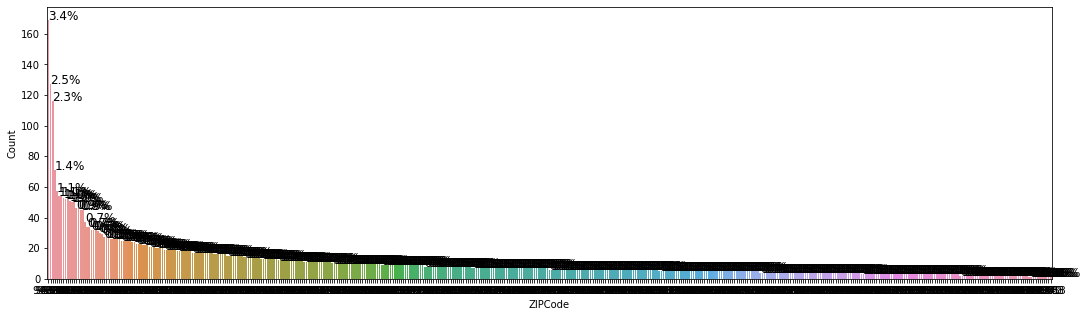

In [24]:
plt.figure(figsize=(18,5))
ax = sns.countplot(data["ZIPCode"], order = data["ZIPCode"].value_counts().index) # Plot histogram
plt.xlabel('ZIPCode')
plt.ylabel('Count')
perc_on_bar(ax,data["ZIPCode"])

In [25]:
# Showing the unique values and their frequencies
(counts, unique) = np.unique(data["ZIPCode"], return_counts=True)
frequencies = np.asarray((counts, unique)).T

print(frequencies)

[[90005     5]
 [90007     6]
 [90009     8]
 [90011     3]
 [90016     2]
 [90018     4]
 [90019     5]
 [90024    50]
 [90025    19]
 [90027     3]
 [90028     8]
 [90029     5]
 [90032     8]
 [90033     9]
 [90034    20]
 [90035     6]
 [90036     7]
 [90037     5]
 [90041    10]
 [90044     2]
 [90045     3]
 [90048     4]
 [90049     9]
 [90057     3]
 [90058     6]
 [90059     4]
 [90064    14]
 [90065     8]
 [90066     6]
 [90068     1]
 [90071     6]
 [90073     6]
 [90086     3]
 [90089    46]
 [90095    71]
 [90210    11]
 [90212     8]
 [90230     6]
 [90232     5]
 [90245    50]
 [90250     9]
 [90254     7]
 [90266    19]
 [90272     2]
 [90274     5]
 [90275     3]
 [90277    16]
 [90280     2]
 [90291    18]
 [90304     2]
 [90401    20]
 [90404     5]
 [90405    10]
 [90502     6]
 [90503     8]
 [90504     6]
 [90505     3]
 [90509     5]
 [90601     4]
 [90623     2]
 [90630    17]
 [90638     5]
 [90639     4]
 [90640     3]
 [90650     3]
 [90717    10]
 [90720   

- Customers' locations are dispersed. No discernable trend can be observed.

### Observations on Family

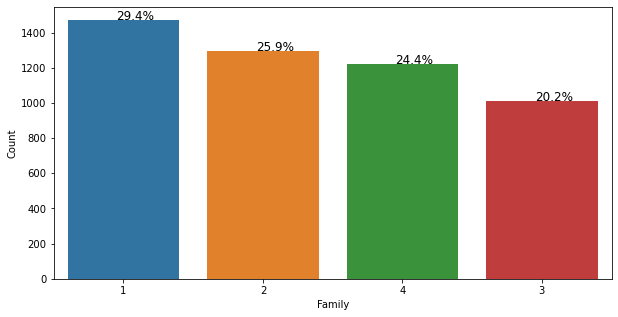

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Family"], order = data["Family"].value_counts().index) # Plot histogram
plt.xlabel('Family')
plt.ylabel('Count')
perc_on_bar(ax,data["Family"])

- Family size of customers are also fairly evenly distributed with more trending towards smaller families.

### Observations on Education

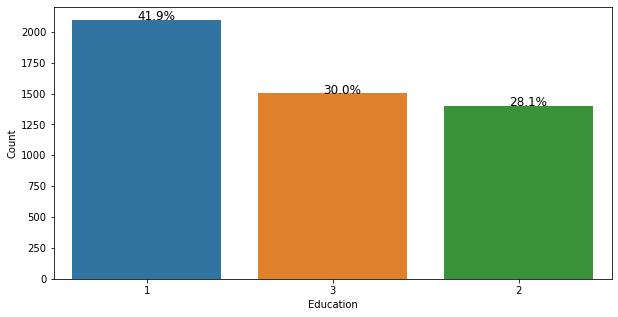

In [27]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Education"], order = data["Education"].value_counts().index) # Plot histogram
plt.xlabel('Education')
plt.ylabel('Count')
perc_on_bar(ax,data["Education"]) # where 1 = Undergrad, 2 = Grad, 3 = Advanced/Professional

- Almost half of the customers are undergrads while just over half are Grads or have higher education.

### Observations on Personal_Loan

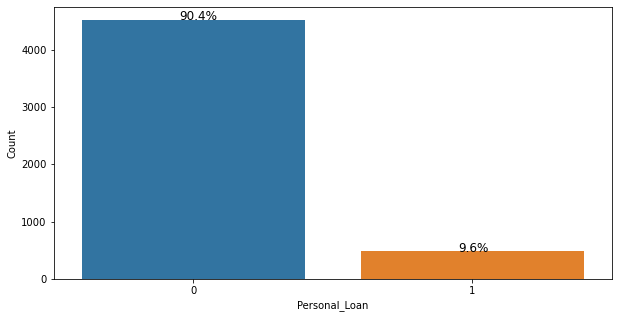

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Personal_Loan"], order = data["Personal_Loan"].value_counts().index) # Plot histogram
plt.xlabel('Personal_Loan')
plt.ylabel('Count')
perc_on_bar(ax,data["Personal_Loan"]) # where 1 = customer accept the personal loan offered in the last campaign, 0 = customer did not accept

- 9.6% of the customers have taken Personal Loans with the bank so far.

### Observations on Securities_Account

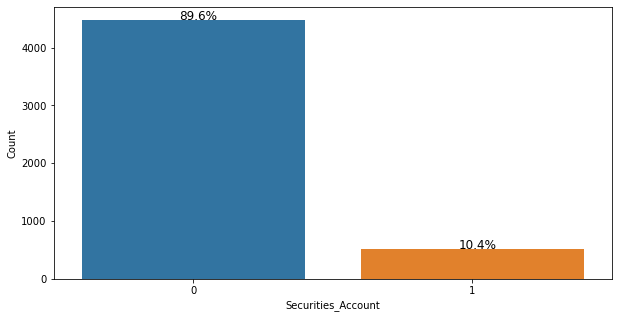

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Securities_Account"], order = data["Securities_Account"].value_counts().index) # Plot histogram
plt.xlabel('Securities_Account')
plt.ylabel('Count')
perc_on_bar(ax,data["Securities_Account"]) # where 1 = customer have securities account with the bank, 0 = customer did not have securities account with the bank

- Almost 90% of the customers do not have securities account with the bank.

### Observations on CD_Account

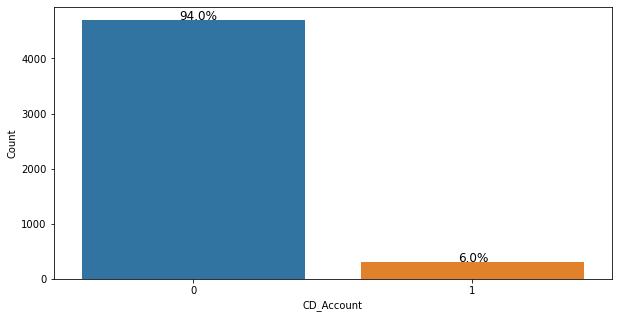

In [30]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["CD_Account"], order = data["CD_Account"].value_counts().index) # Plot histogram
plt.xlabel('CD_Account')
plt.ylabel('Count')
perc_on_bar(ax,data["CD_Account"]) # where 1 = customer have a certificate of deposit (CD) account with the bank, 0 = customer did not have certificate of deposit (CD) account with the bank

- 94% of the customers do not have CD account with the bank.

### Observations on Online

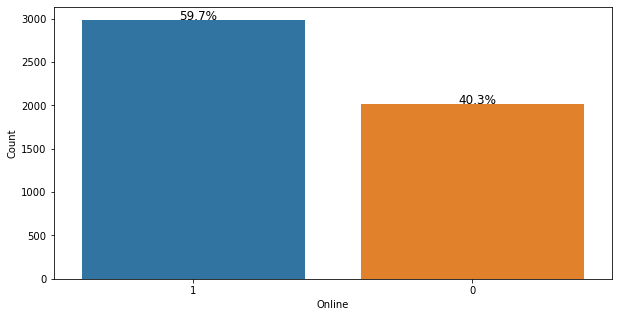

In [31]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Online"], order = data["Online"].value_counts().index) # Plot histogram
plt.xlabel('Online')
plt.ylabel('Count')
perc_on_bar(ax,data["Online"]) # where 1 = customer use internet banking facilities, 0 = customer do not use internet banking facilities

- Almost 60% of the customers use internet banking facilities.

### Observations on CreditCard

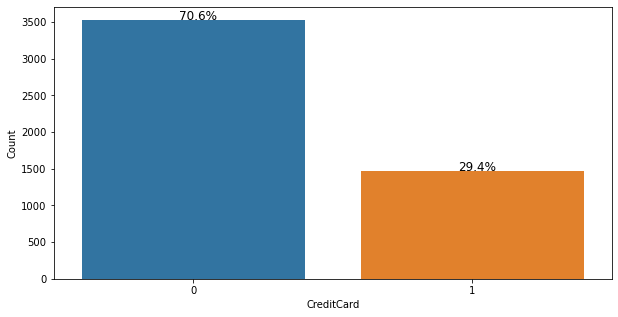

In [32]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["CreditCard"], order = data["CreditCard"].value_counts().index) # Plot histogram
plt.xlabel('CreditCard')
plt.ylabel('Count')
perc_on_bar(ax,data["CreditCard"]) # where 1 = customer use a credit card issued by any other Bank, 0 = customer do not use a credit card issued by any other Bank

- About 70% of the customers do not use a credit card issued by any other Bank.

## Bivariate Analysis

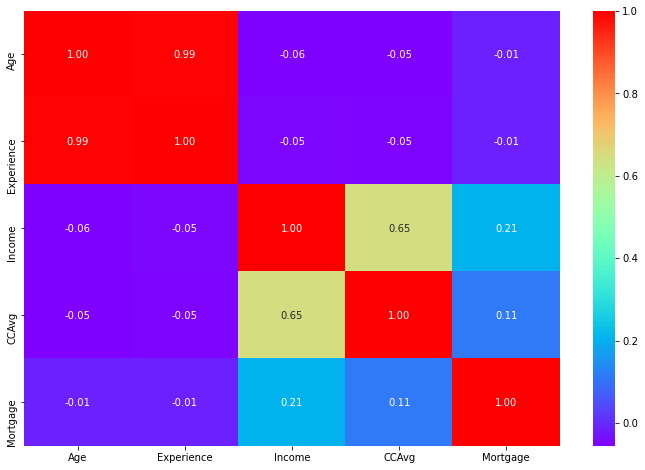

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

**Observations**
- Age and Work Experience of customers is very closely correlated
- Income and Average credit card spent per month is also correlated
- Other variables have no significant correlation between them

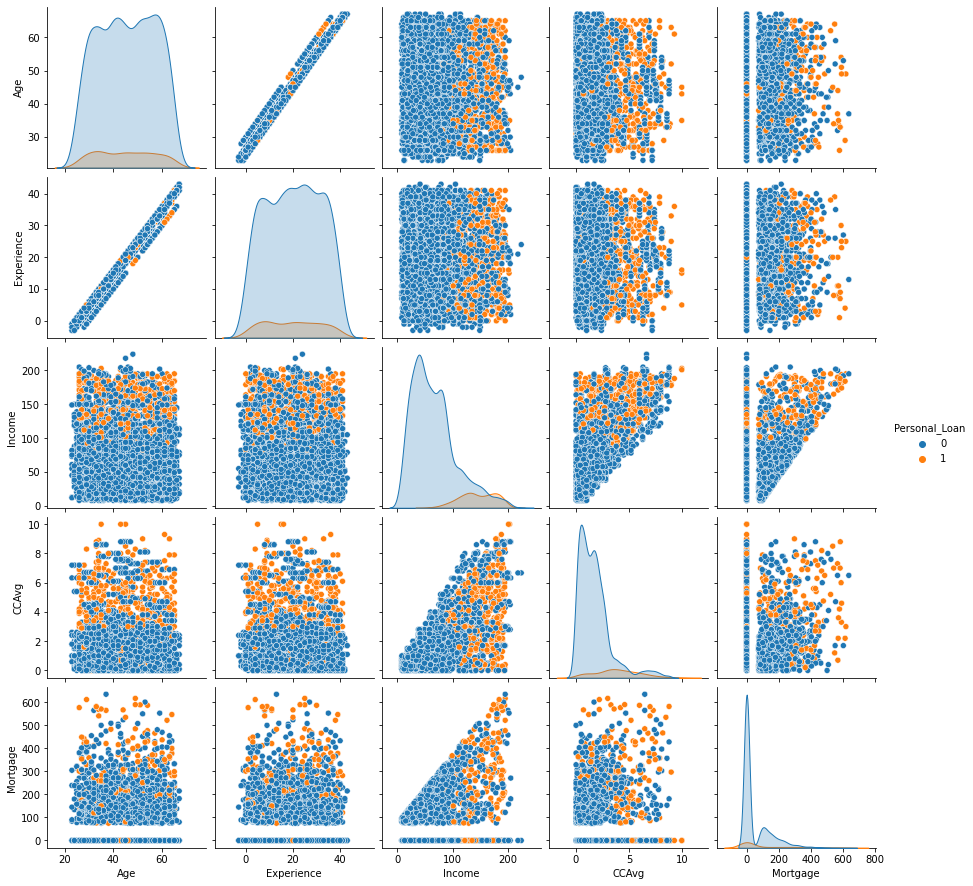

In [34]:
sns.pairplot(data,diag_kind='kde',vars=["Age", "Experience", "Income", "CCAvg", "Mortgage"], hue="Personal_Loan")

**Observations**
- Customers higher income and average credit card spending are more likely to accept presonal loans over lower income and average credit card spending.
- Customers with higher mortgage value have a slight tendency to accept personal loans.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 263.8 KB


### Observations on Personal Loan vs Age

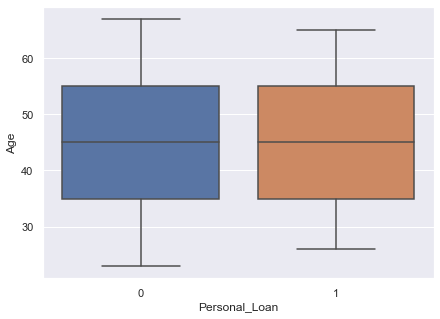

In [36]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.boxplot(x="Personal_Loan", y="Age", data=data, orient="vertical")
plt.show()

- We can see that median ages and age distribution between 25th percentile to 75th percentile of personal loaners and non personal loaners are similar.
- The age ranges of customers taking up personal loan is between ~ 27 to 66
- There are no outliers in boxplots of both class distributions

### Observations on Personal Loan vs Experience

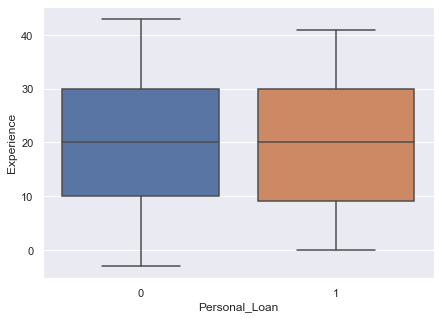

In [37]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.boxplot(x="Personal_Loan", y="Experience", data=data, orient="vertical")
plt.show()

- We can see that median work experience and work experience distribution between 25th percentile to 75th percentile of personal loaners and non personal loaners is about similar with the IQR range a little wider.
- The work experience ranges of customers taking up personal loan is between ~ 0 to 41
- The negative work experience values may need fixing.
- There are no outliers in boxplots of both class distributions

### Observations on Personal Loan vs Income

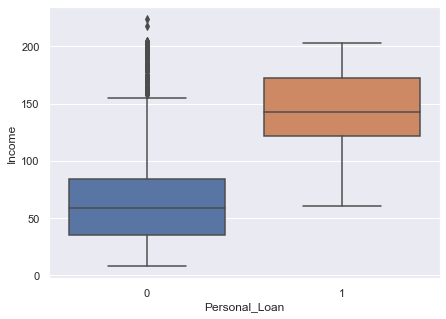

In [38]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.boxplot(x="Personal_Loan", y="Income", data=data, orient="vertical")
plt.show()

- We can see that median and distribution of personal loaners' income levels are higher at just under 150K and IQR between about 125K to 175K. There are no outliers. 
- This is compared to non personal loaners at median income of ~ 60K and IQR between close to 0 to just above 150K.
- The personal loaners income ranges from just above 50K to ~ 200K compared to non loaners range for 1.5 IQR of just above 0 income to just above 150K.
- There are outliers in boxplots of class distributions of non personal loaners with higher income ranges.

### Observations on Personal Loan vs CCAvg

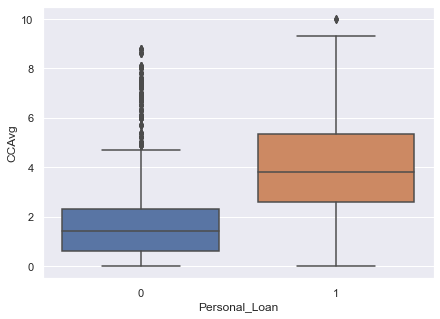

In [39]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.boxplot(x="Personal_Loan", y="CCAvg", data=data, orient="vertical")
plt.show()

- We can see that median and distribution of personal loaners' credit card average spending are higher at just under 4K and IQR between about 2.2K to 5.5K. There are outliers at high credit card spending at 10K. 
- This is compared to non personal loaners at median credit card spending of ~ 1.5K and IQR between less than 1K to just above 2K.
- The personal loaners credit card average spending of 1.5 IQR ranges up to above 9K compared to non loaners up to just under 5K. 
- There are outliers in boxplots of class distributions of personal and non personal loaners with higher credit card spending.

### Observations on Personal Loan vs Mortgage

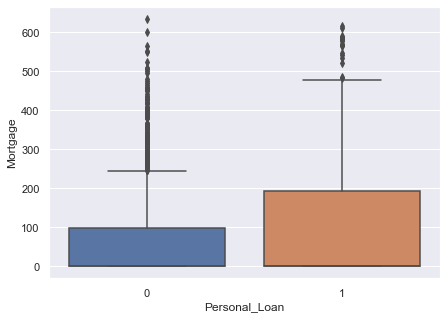

In [40]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.boxplot(x="Personal_Loan", y="Mortgage", data=data, orient="vertical")
plt.show()

- We can see that distribution of personal loaners' mortgage are higher at IQR up to just under 200K.
- This is compared to non personal loaners at IQR up to just 100K.
- The personal loaners mortgage ranges of 1.5 IQR is also higher at just under 500K compared to non loaners at 250K. 
- There are outliers in boxplots of class distributions of personal and non personal loaners on the higher end of mortgage values.

**Insights**
- Personal loaners tended towards high income customers with higher credit card spending. 
- Mortgage takers who accepted personal loans also tended towards those with higher mortgage values.

In [41]:
## Function to plot stacked bar chart

def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 263.8 KB


### Observations on Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


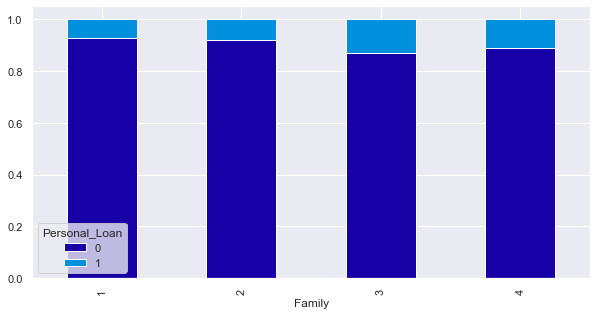

In [43]:
stacked_plot(data["Family"])

- Customers with larger families are more likely to take personal loans than smaller families.

### Observations on Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


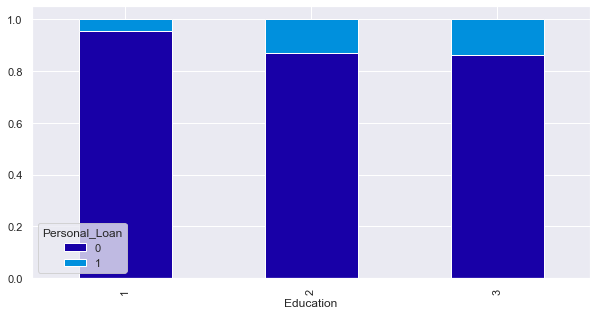

In [44]:
stacked_plot(data["Education"])

- Customers who have graduated or with advanced degrees are more likely to take personal loans.

### Observations on Personal Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


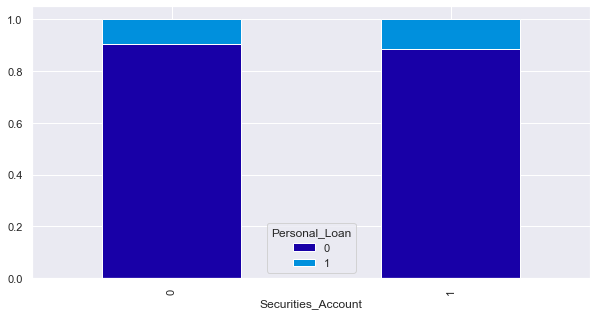

In [45]:
stacked_plot(data["Securities_Account"])

- There is no discernable differences between proportion of personal loan takers among those with or without securities accounts. 

### Observations on Personal Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


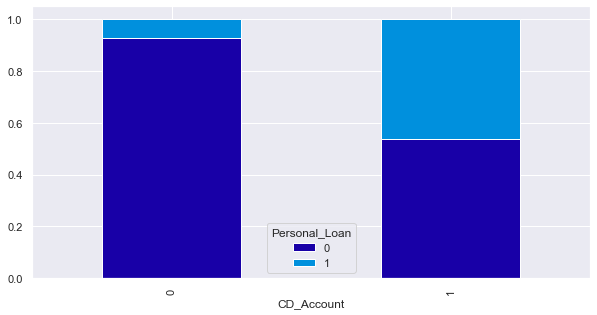

In [46]:
stacked_plot(data["CD_Account"])

- Customers who have CD accounts (fixed term deposits) are very likely to take personal loans close to half of them.

### Observations on Personal Loan vs Online

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


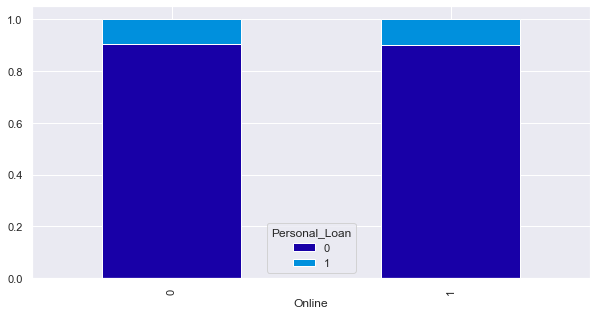

In [47]:
stacked_plot(data["Online"])

- There is no discernable differences between proportion of personal loan takers among using online banking facilities or not.

### Observations on Personal Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


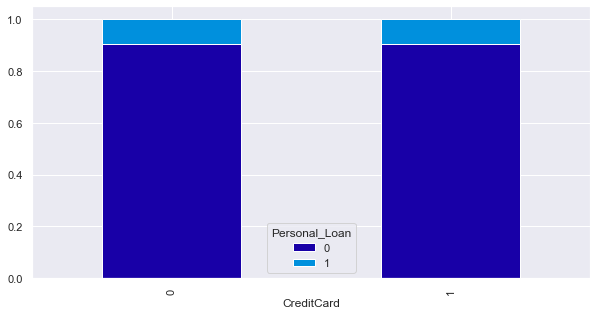

In [48]:
stacked_plot(data["CreditCard"])

- There is no discernable differences between proportion of personal loan takers among those who use other banks issued credit cards or not.

### Observations on Personal Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
90005             5    0     5
90007             6    0     6
90009             8    0     8
90011             3    0     3
90016             1    1     2
...             ...  ...   ...
96094             2    0     2
96145             1    0     1
96150             4    0     4
96651             6    0     6
All            4520  480  5000

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


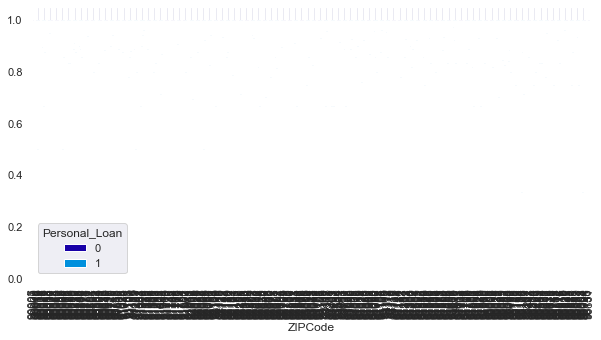

In [49]:
stacked_plot(data["ZIPCode"])

- There is no discernable trend of more or less personal loan takers from any Zip code.

**Insights**
- Customers with CD accounts are most likely to accept a personal loan from the bank.
- Customers with family sizes more than 2 or who have graduated or with advanced/professional degrees are more likely to accpet a personal loan.

# Data Pre-Processing

## Missing Values

In [50]:
data.isnull().values.any() # If there are any null or missing values in data set; 

# Pandas will recognize both empty cells and “NA” types as missing values
# To detect NaN values numpy uses np.isnan().
# To detect NaN values pandas uses either .isna() or .isnull().
# The NaN values are inherited from the fact that pandas is built on top of numpy, 
# while the two functions' names originate from R's DataFrames, whose structure and functionality pandas tried to mimic.

False

- There are no missing values.

## Duplicate Values

In [51]:
data[data.duplicated()].count() # Find out duplicates in the data set

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no duplicate entries.

## Treating Outliers

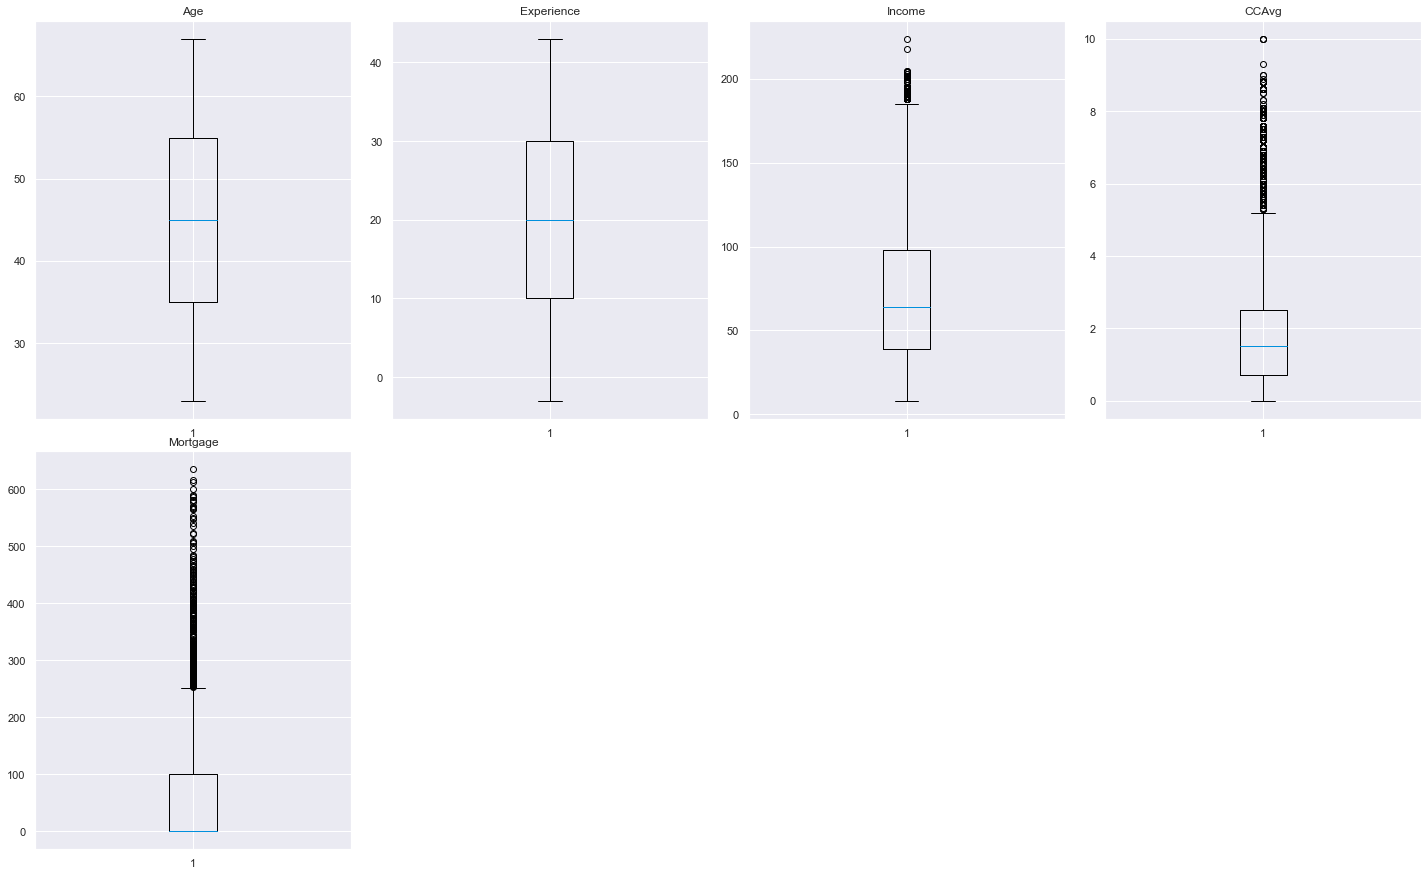

In [52]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

**Observations**
- We will not treat these outliers as they represent the real market trend.

## Feature Engineering

- Education variable values will be converted to words.
- ZIPCode variable will be removed as it has over 400 unique values with the highest frequency at 3.4% only so it is too widely dispersed to serve any trending and it has no bearing on personal loan takers.

### Education Conversion

In [53]:
data["Education"].head(10)

0    1
1    1
2    1
3    2
4    2
5    2
6    2
7    3
8    2
9    3
Name: Education, dtype: category
Categories (3, int64): [1, 2, 3]

In [54]:
data["Education"] = data["Education"].astype("str") # convert string to use lambda

In [55]:
data['Education'] = data['Education'].apply(lambda x: 'Undergrad' if x=='1' else x)
data['Education'] = data['Education'].apply(lambda x: 'Grad' if x=='2' else x)
data['Education'] = data['Education'].apply(lambda x: 'Advanced' if x=='3' else x)
# where 1 = Undergrad, 2 = Grad, 3 = Advanced/Professional

In [56]:
data["Education"].head(10)

0    Undergrad
1    Undergrad
2    Undergrad
3         Grad
4         Grad
5         Grad
6         Grad
7     Advanced
8         Grad
9     Advanced
Name: Education, dtype: object

In [57]:
data["Education"] = data["Education"].astype("category") # convert to category

- Education variable values are converted to word values as above.

### ZIPCode Removal

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 263.8 KB


In [59]:
# data = data.drop(['ZIPCode'],axis=1)
# data.drop(["ZIPCode"],axis=1,inplace=True)
data = data.drop(['ZIPCode'],axis=1) 

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.4 KB


- ZIPCode variable values has been removed.

## Split data

In [61]:
Y = data["Personal_Loan"]
X = data.drop("Personal_Loan" , axis=1)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
# X = pd.get_dummies(X,columns=['Family','Education'],drop_first=True)


# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [62]:
X.head(10)

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,25,1,49,1.6,0,0,0,1,0,1,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,1,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,1,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0,0,1
5,37,13,29,0.4,155,0,0,1,1,0,0,0,1,0
6,53,27,72,1.5,0,1,0,0,1,0,0,0,1,0
7,50,24,22,0.3,0,0,0,0,0,0,0,0,0,1
8,35,10,81,0.6,104,0,1,0,1,0,0,0,1,0
9,34,9,180,8.9,0,0,0,0,0,0,0,0,0,0


# Model building - Logistic Regression

In [63]:
# Define the Confusion Matrix Function

from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Fit logistic regression model  (Statsmodel) 

## Model Evaluation Criterion

### Model can make wrong predictions as:
1. False Positive: Predicting a customer is a personal loan convertable but actually not convertable.
2. False Negative: Predicting a customer is a personal loan non-convertable but actually convertable.

### Which case is more important? 
* Both the cases are important as:

* If we predict a customer is a personal loan convertable but actually not convertable then a wrong person will be getting the targeted marketing effort wasting resources.

* If we predict a customer is a personal loan non-convertable but actually convertable, that person will not be able to receive targeted marketing effort and hence may not be aware of the personal loan service and thus a loss of business.

### How to reduce losses?
* We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
*  Therefore, `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

In [64]:
import statsmodels.api as sm

# adding constant to training and test set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.Logit( y_train, X_train )

lg = logit.fit()

print(lg.summary2())

# Let's Look at Model Performance
y_pred = lg.predict(X_train) 
pred_train = list(map(round, y_pred))

y_pred1 = lg.predict(X_test) 
pred_test = list(map(round, y_pred1))

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.117686
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.618      
Dependent Variable:   Personal_Loan     AIC:               853.8055   
Date:                 2021-06-11 22:18  BIC:               946.2133   
No. Observations:     3500              Log-Likelihood:    -411.90    
Df Model:             14                LL-Null:           -1077.3    
Df Residuals:         3485              LLR p-value:       1.3033e-275
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                -7.5362   2.1241  -3.5480 0.0004 -11.6993 -3.3731
Age

**Observations**
- The outputs are pretty reliable for our targeted marketing prediction purposes but data might contain multicollinearity so variables can be removed based on insignificance where pvalue > 0.05.
- f1 score can still be improved at 75.3% for train data and 80.7% for test data.
- Age has pvalue=0.6492 so it could be dropped due to insignificance.
- Experience has pvalue=0.5416 so it could be dropped due to insignificance.
- Mortgage has pvalue=0.0706 so it could be dropped due to insignificance.
- Some variables of Family and Education are significant, so we won't drop any of these.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                   485.134684
Age                      93.542430
Experience               93.412885
Income                    1.886842
CCAvg                     1.725779
Mortgage                  1.061917
Family_2                  1.386231
Family_3                  1.385494
Family_4                  1.418310
Education_Grad            1.445589
Education_Undergrad       1.554669
Securities_Account_1      1.144488
CD_Account_1              1.342380
Online_1                  1.042382
CreditCard_1              1.113117
dtype: float64



**Observations**
- Age and Experience seemed to be correlated so one or both has to be removed.

In [66]:
# Age has highest p values among those with p-value greater than 0.05

X_train1 = X_train.drop('Age', axis =1)
X_test1 = X_test.drop('Age',axis =1)

logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance
y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.117716
         Iterations 9
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.618      
Dependent Variable:  Personal_Loan     AIC:               852.0153   
Date:                2021-06-11 22:18  BIC:               938.2625   
No. Observations:    3500              Log-Likelihood:    -412.01    
Df Model:            13                LL-Null:           -1077.3    
Df Residuals:        3486              LLR p-value:       1.4011e-276
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      9.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                -8.4791   0.4919 -17.2357 0.0000 -9.4433 -7.5149
Experience      

**Observations**
- The output scores did not change.
- Experience has pvalue=0.1233 so it could still be dropped due to insignificance.
- Mortgage has pvalue=0.0736 so it could still be dropped due to insignificance.
- Some variables of Family and Education are significant, so we won't drop any of these.

In [67]:
vif_series2 = pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                   13.943249
Experience               1.009660
Income                   1.881267
CCAvg                    1.719837
Mortgage                 1.061910
Family_2                 1.385833
Family_3                 1.375617
Family_4                 1.417950
Education_Grad           1.418695
Education_Undergrad      1.455419
Securities_Account_1     1.144219
CD_Account_1             1.340403
Online_1                 1.042342
CreditCard_1             1.113011
dtype: float64



**Observations**
- None of the variables seems to be correlated, so the values in summary are reliable

In [68]:
# Experience has next highest p values among those with p-value greater than 0.05

X_train2 = X_train1.drop('Experience', axis =1)
X_test2 = X_test1.drop('Experience',axis =1)

logit2 = sm.Logit(y_train, X_train2 )
lg2 = logit2.fit()
print(lg2.summary2())

# Let's Look at Model Performance
y_pred = lg2.predict(X_train2) 
pred_train = list(map(round, y_pred))

y_pred1 = lg2.predict(X_test2) 
pred_test = list(map(round, y_pred1))

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.118057
         Iterations 9
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.616      
Dependent Variable:  Personal_Loan     AIC:               852.3995   
Date:                2021-06-11 22:18  BIC:               932.4862   
No. Observations:    3500              Log-Likelihood:    -413.20    
Df Model:            12                LL-Null:           -1077.3    
Df Residuals:        3487              LLR p-value:       4.2512e-277
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      9.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                -8.2188   0.4578 -17.9526 0.0000 -9.1160 -7.3215
Income          

**Observations**
- The precision score has improved by 1% point to 87.1% for train data and 90.4% for test data.
- The recall and f1 score dipped slightly and accuracy score remained the same.
- Mortgage has pvalue=0.0717 so it could still be dropped due to insignificance.
- Some variables of Family and Education are significant, so we won't drop any of these.

In [69]:
# Mortgage has next highest p values among those with p-value greater than 0.05

X_train3 = X_train2.drop('Mortgage', axis =1)
X_test3 = X_test2.drop('Mortgage',axis =1)

logit3 = sm.Logit(y_train, X_train3 )
lg3 = logit3.fit()
print(lg3.summary2())

# Let's Look at Model Performance
y_pred = lg3.predict(X_train3) 
pred_train = list(map(round, y_pred))

y_pred1 = lg3.predict(X_test3) 
pred_test = list(map(round, y_pred1))

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.118517
         Iterations 9
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.615      
Dependent Variable:  Personal_Loan     AIC:               853.6211   
Date:                2021-06-11 22:18  BIC:               927.5473   
No. Observations:    3500              Log-Likelihood:    -414.81    
Df Model:            11                LL-Null:           -1077.3    
Df Residuals:        3488              LLR p-value:       1.8717e-277
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      9.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                -8.1757   0.4570 -17.8915 0.0000 -9.0713 -7.2800
Income          

**Observations**
- The accuracy score for test data improved to reach 96.4%.
- The precision score for test data improved to reach 91.87%.
- The recall and f1 score stayed the same.
- All variables are significant.
- Some variables of Family and Education are significant, so we won't drop any of these.

In [70]:
# Odds from coefficients

odds = np.exp(lg3.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train3.columns, columns=['odds']) # adding the odds to a dataframe

,odds
const,0.000281
Income,1.060735
CCAvg,1.184907
Family_2,1.005842
Family_3,5.588106
Family_4,5.495865
Education_Grad,0.869468
Education_Undergrad,0.023361
Securities_Account_1,0.414659
CD_Account_1,39.790847


In [71]:
# % change in odds

perc_change_odds = (np.exp(lg3.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train3.columns, columns=['change_odds%']) # adding the change_odds% to a dataframe

,change_odds%
const,-99.971858
Income,6.073488
CCAvg,18.490686
Family_2,0.584151
Family_3,458.810597
Family_4,449.586465
Education_Grad,-13.053202
Education_Undergrad,-97.663859
Securities_Account_1,-58.534141
CD_Account_1,3879.084683


***Conclusion***
- lg3 is the final model that we will use for predictions and inferences.
- Income, CCAvg, Family, Education, Securities accounts, CD accounts, Online and CreditCard are important variables here.
- All coefficients are positive except for the Education variables, Securities accounts, Online and CreditCard variables.
- CD_Account variable has the most significant positive influence in target variable, increasing odds by up to 3879% of taking personal loan, so there is a high chance marketing personal loan products to CD account holders will yield convertable customers.
- Education_Undergrad variable has the most significant negative influence in target variable , decreasing odds by 97.7%, so there is a very low chance undergrads will take up a personal loan.
- Larger family sizes (Family_3,Family_4) also increase the odds significantly of taking up a personal loan
- Using a credit card issued from other banks (CreditCard), having a securities account (Securities_Account) and using the bank online facilities (Online) also decrease the odds significantly of taking up a personal loan with the bank.
- Please note that when coefficient is b , than change in odds is (exp(b)-1)*100 %

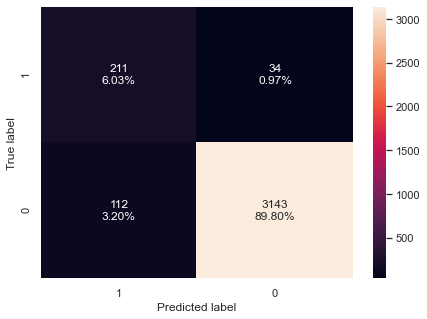

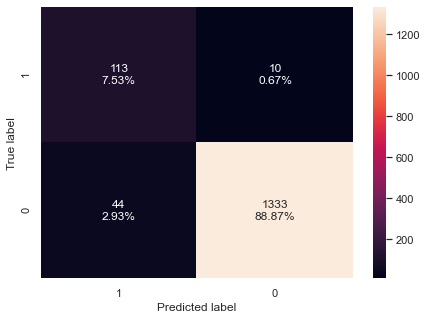

In [72]:
# let us make confusion matrix on train and test sets for lg3 model original

make_confusion_matrix(y_train,pred_train)
make_confusion_matrix(y_test,pred_test)

## Further Model Improvement 

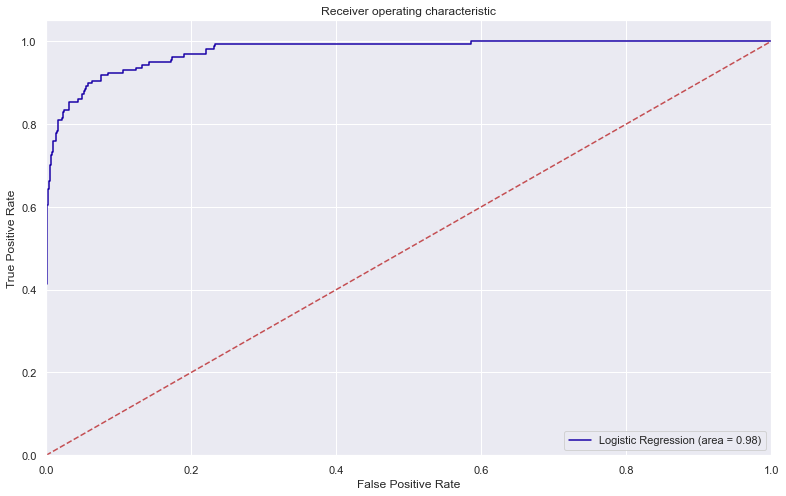

In [73]:
#AUC ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 ### Improve Model using AUC-ROC curve

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.14607169199477438


In [75]:
# Model prediction with optimal threshold

pred_train_opt = (lg3.predict(X_train3)>optimal_threshold).astype(int)
pred_test_opt = (lg3.predict(X_test3)>optimal_threshold).astype(int)

In [76]:
#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9274285714285714
Accuracy on test data: 0.9226666666666666
Recall on train data: 0.8452012383900929
Recall on test data: 0.910828025477707
Precision on train data: 0.5723270440251572
Precision on test data: 0.5836734693877551
f1 score on train data: 0.6824999999999999
f1 score on test data: 0.7114427860696517


**Observations**
- Using Optimal Threshold from the AUC-ROC curve on lg3 unfortunately yielded a poorer model than the original lg3, with only recall scores improving and other scores performing poorer especially the f1 score.

 ### Improve Model using Precision-Recall curve

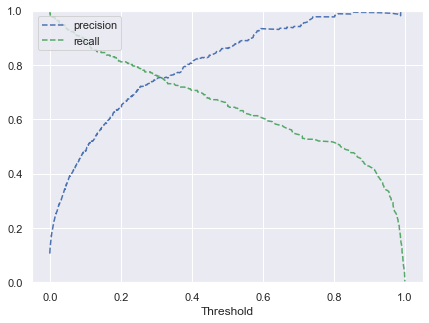

In [77]:
from sklearn.metrics import precision_recall_curve

y_scores=lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**Observations**
- A good f1 score requires a highest possible precision and recall score combination which suggests a 0.3 optimum threshold from the Precision-Recall curve intersection.

In [78]:
# Set optimal threshold = 0.3

optimal_threshold = 0.3

# Model prediction with optimal threshold

pred_train_opt = (lg3.predict(X_train3)>optimal_threshold).astype(int)
pred_test_opt = (lg3.predict(X_test3)>optimal_threshold).astype(int)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9545714285714286
Accuracy on test data: 0.9573333333333334
Recall on train data: 0.7616099071207431
Recall on test data: 0.8343949044585988
Precision on train data: 0.75
Precision on test data: 0.7751479289940828
f1 score on train data: 0.7557603686635945
f1 score on test data: 0.8036809815950919


**Observations**
- Accuracy scores for train and test data are closer than the original lg3 model.
- Recall scores are higher but precision scores dipped.
- F1 scores stayed the largely the same.

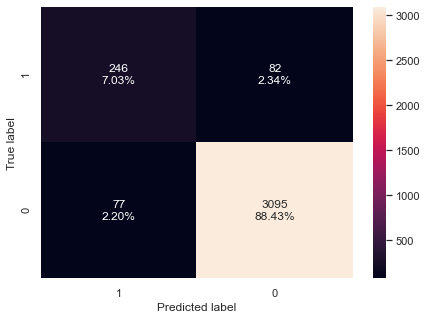

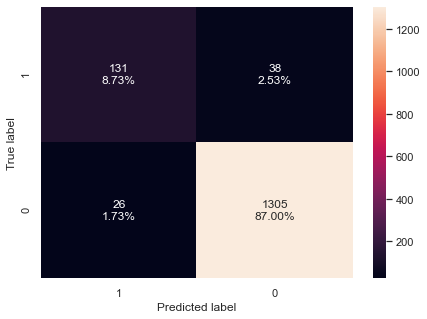

In [79]:
# let us make confusion matrix on train and test sets for lg3 model with optimum threshold = 0.3

make_confusion_matrix(y_train,pred_train_opt)
make_confusion_matrix(y_test,pred_test_opt)

### Comparing Confusion Matrix for unseen data

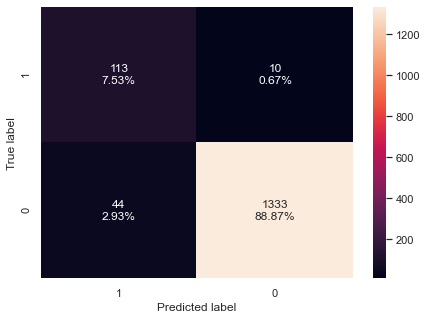

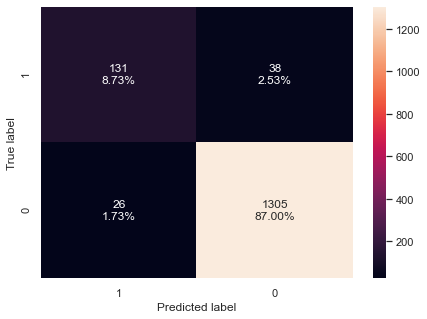

In [80]:
# let us make confusion matrix on test sets for lg3 model original and lg3 model optimum threshold = 0.3

make_confusion_matrix(y_test,pred_test)
make_confusion_matrix(y_test,pred_test_opt)

**Observations**
- lg3 model with optimum threshold = 0.3 is preferable because even though precision is lower, the % of True Positives achieved by the second model is higher which means proportion of true personal loan customers were marketed to.

## Conclusion and Recommendations

- The best test recall is 83% but the test precision is is lower at 77.5%. This means that the model is not as good at identifying potential personal loan takers than identifying non personal loan takers so therefore the bank can lose many opportunities of marketing personal loan to would be customers.   
- The model performance can be improved, especially in terms of precision and the bank can use use the model for new customers once desired level of model performance is achieved.
- The analysis showed that customers with CD accounts, larger family sizes of above 2 are more likely to accept personal loans. More marketing effort can be focused on them.
- It also showed that undergraduate customers, customers who use a credit card from other banks, have a securities account or use bank online facilities are less likely to accept a personal loan from the bank. Less marketing effort can be spent on them.

# Model building - Decision Trees

## Model Evaluation Criterion
* The scoring criteria shall be the same as the logistic regression model.
* We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
*  Therefore, `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Build Decision Tree Model 1

In [82]:
print (X_train.columns)

Index(['const', 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family_2',
       'Family_3', 'Family_4', 'Education_Grad', 'Education_Undergrad',
       'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1'],
      dtype='object')


- The "const" column need to be removed for decision tree modelling. This column came from adding it for statsmodel modelling. This also applies for X_Test, y_train and y_test which are all modified by stats modelling.

In [83]:
# splitting in training and test set; reinitializing for decision tree modelling
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [84]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [85]:
#  Function to calculate recall score

def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [86]:
#  Function to calculate precision score

def get_precision_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
    print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

In [87]:
#  Function to calculate f1 score

def get_f1_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
    print("f1 score on test set : ",metrics.f1_score(y_test,pred_test))

In [88]:
## Function to create confusion matrix for dTree

def make_confusion_matrix_dTree(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

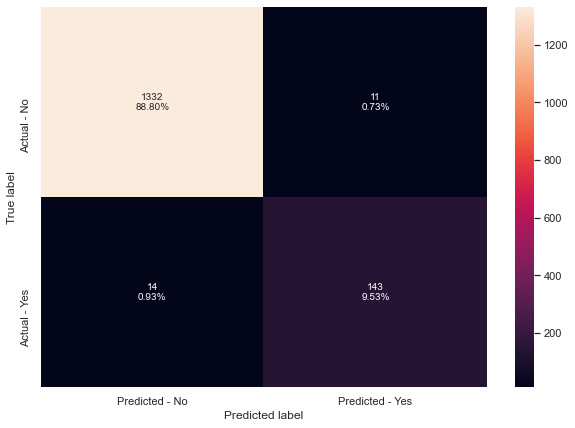

In [89]:
make_confusion_matrix_dTree(dTree,y_test)

In [90]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

get_recall_score(dTree) # using get_recall_score function previously defined on dTree
get_precision_score(dTree) # using get_precision_score function previously defined on dTree
get_f1_score(dTree) # using get_f1_score function previously defined on dTree

Accuracy on training set :  1.0
Accuracy on test set :  0.9833333333333333
Recall on training set :  1.0
Recall on test set :  0.910828025477707
Precision on training set :  1.0
Precision on test set :  0.9285714285714286
f1 score on training set :  1.0
f1 score on test set :  0.9196141479099679


**Observations**
- The scores indicate a complex tree that overfits the training data and scores for training and testing data are not close.
- F1 scores for training and testing data are 100% and 91.96% which is quite good.

## Visualizing Decision Tree 1

In [91]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_Grad', 'Education_Undergrad', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


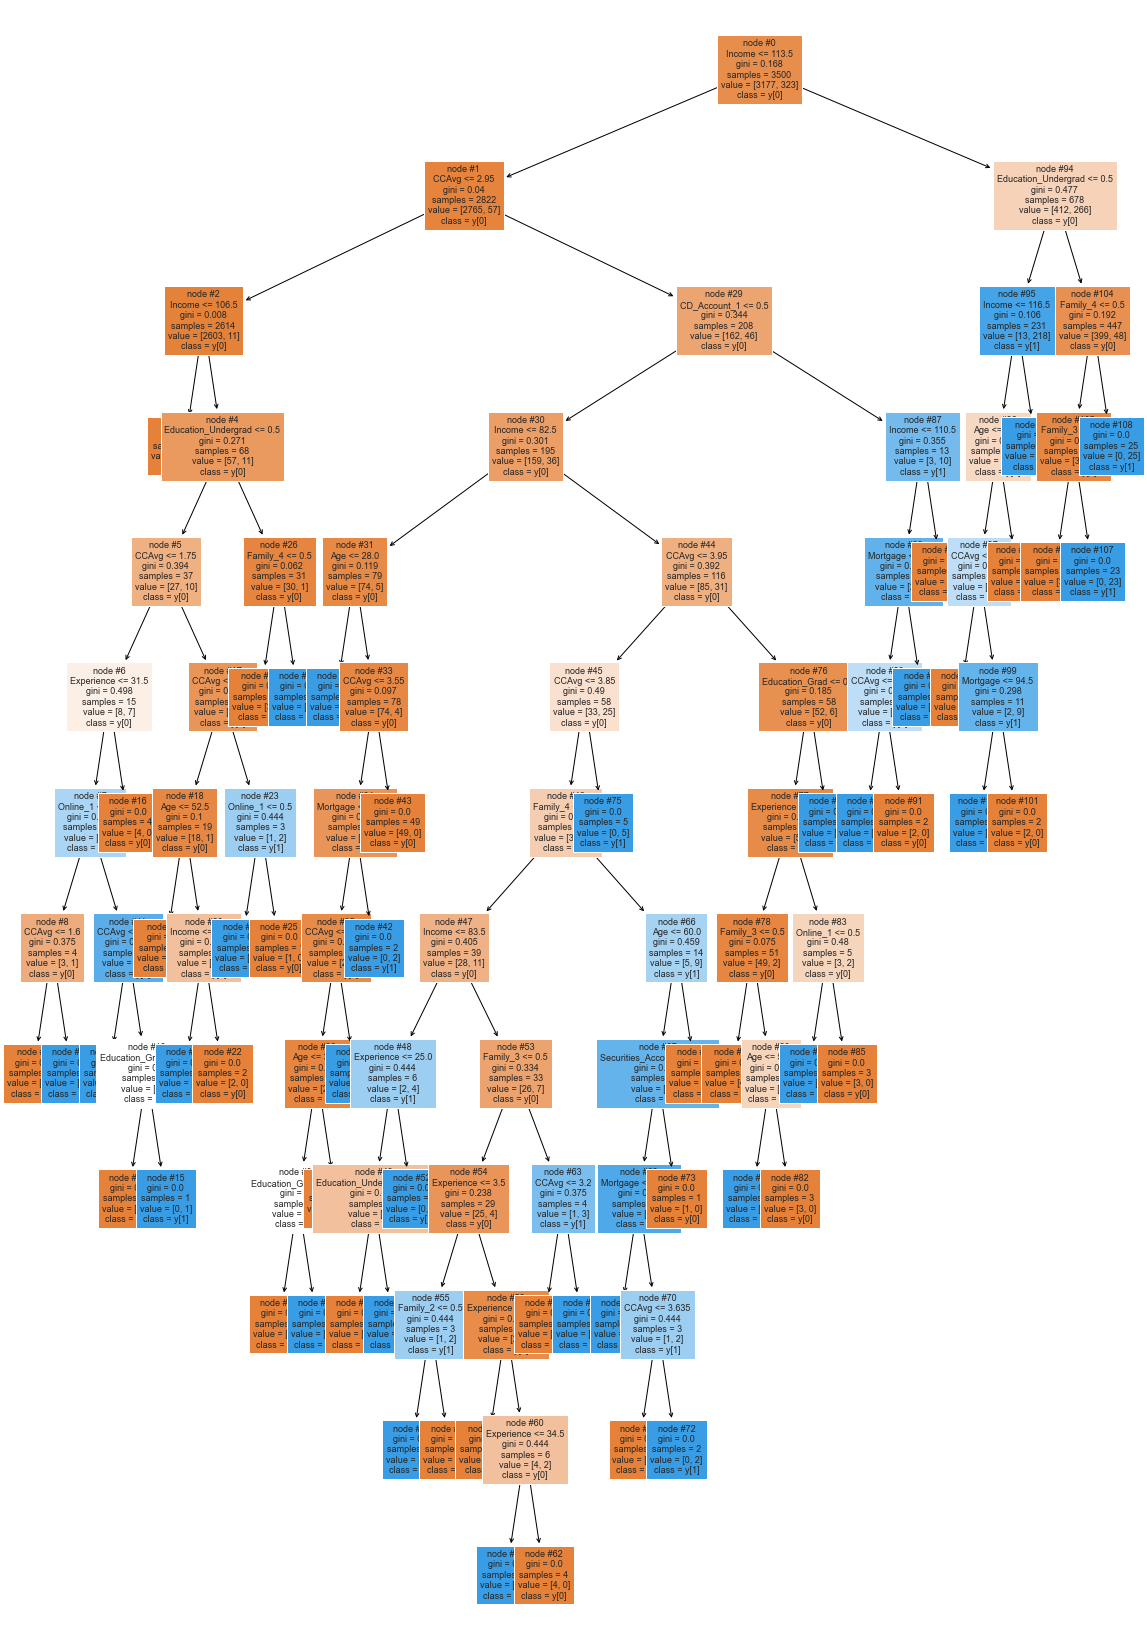

In [92]:
# Plotting a visualization of the tree
plt.figure(figsize=(20,30))

out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [93]:
# Text report showing the rules of a decision tree, a text form of the decision tree
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |--- Experience <= 31.50
|   |   |   |   |   |   |--- Online_1 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 1.60
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  1.60
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Online_1 >  0.50
|   |   |   |   |   |   |   |--- CCAvg <= 1.25
|   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  1.25
|   |   |   |   |   |   |   |   |--- Education_Grad <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Education_Grad >  0.50
|   |   |   |   |   |   |   |   |   |--- we

In [94]:
# importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Education_Undergrad   0.368865
Income                0.302524
Family_3              0.081124
Family_4              0.079839
CCAvg                 0.077853
Age                   0.020898
Experience            0.017834
CD_Account_1          0.014207
Mortgage              0.013414
Online_1              0.009567
Education_Grad        0.009090
Securities_Account_1  0.002512
Family_2              0.002274
CreditCard_1          0.000000


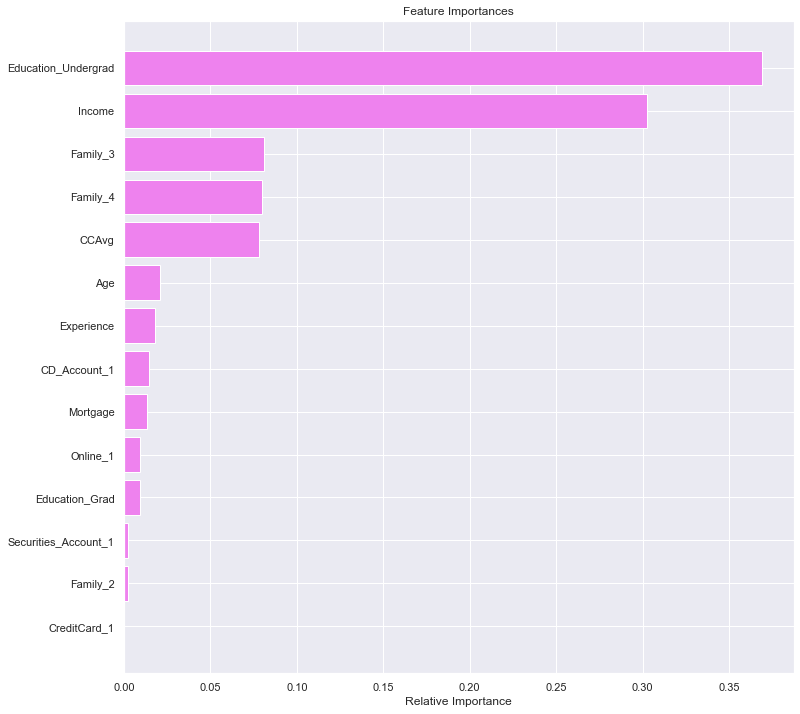

In [95]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
- According to the decision tree model, Education_Undergrad and Income are the most important variables for predicting the customer personal loan acceptance.
- The tree above is very complex, such a tree often overfits.

## Build Decision Tree Model 2 - Pre-Pruning: Using GridSearch for Hyperparameter tuning
### Runs through several hyper parameters to pre prune with the best one

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of hyperparameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters  
# Clf is an estimator instance, which is used to store model
# We use clf to store trained model values, which are further used to predict value, based on the previously stored weights.
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

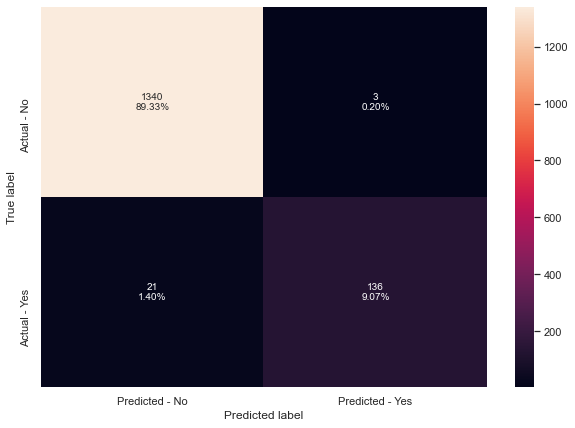

In [98]:
make_confusion_matrix_dTree(estimator,y_test)

In [99]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))

get_recall_score(estimator) # Recall on train and test
get_precision_score(estimator) # Precision on train and test
get_f1_score(estimator) # F1_Score on train and test

Accuracy on training set :  0.9831428571428571
Accuracy on test set :  0.984
Recall on training set :  0.826625386996904
Recall on test set :  0.8662420382165605
Precision on training set :  0.9888888888888889
Precision on test set :  0.9784172661870504
f1 score on training set :  0.9005059021922428
f1 score on test set :  0.918918918918919


**Observations**
- The scores indicate a more generalized tree that has closer scores for both training and testing data.
- F1 scores for training and testing data are 90% and 91.9% which is better in terms of proximity and consistency compared to Decision Tree Model 1.

## Visualizing Decision Tree 2

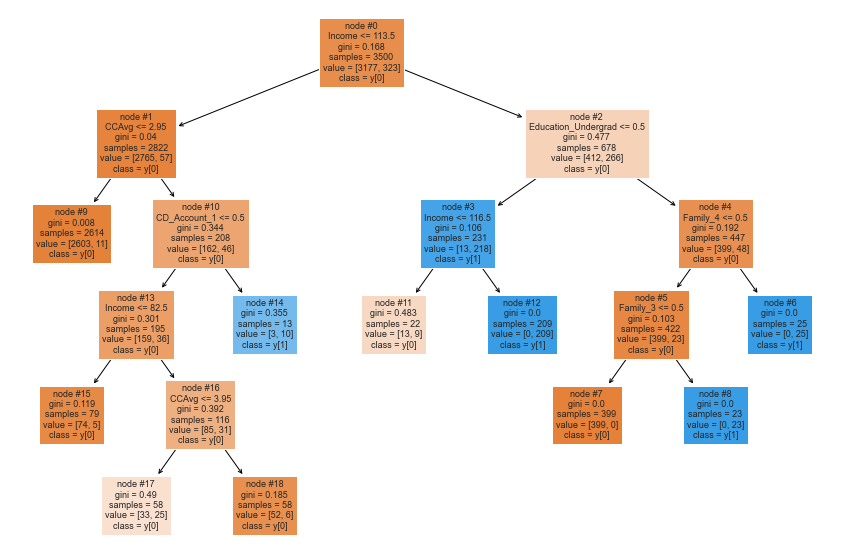

In [100]:
# Plotting a visualization of the tree
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [101]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2603.00, 11.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [74.00, 5.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |--- weights: [33.00, 25.00] class: 0
|   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |--- weights: [52.00, 6.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  113.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.00, 9.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 209.00] class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family_4 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- weights: [399.00, 0.00] class: 0
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [0.00, 23.00] class: 1
|  

In [102]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                           Imp
Education_Undergrad   0.425551
Income                0.337992
Family_3              0.086873
Family_4              0.084287
CCAvg                 0.048657
CD_Account_1          0.016640
Age                   0.000000
Experience            0.000000
Mortgage              0.000000
Family_2              0.000000
Education_Grad        0.000000
Securities_Account_1  0.000000
Online_1              0.000000
CreditCard_1          0.000000


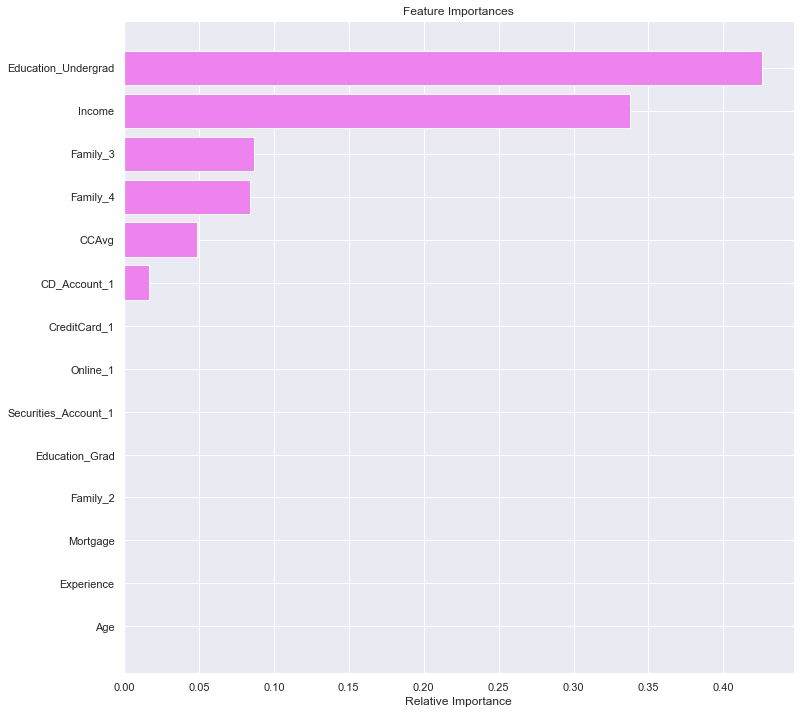

In [103]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
- According to the decision tree model, Education_Undergrad and Income are still the most important variables for predicting the customer personal loan acceptance.
- Only up to CD_Account_1 does it still have importance in the model, several variables are no longer important.

## Build Decision Tree Model 3 - Post-Pruning: Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [104]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train) # Find the path of cost complexity pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [105]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000245,0.000490
2,0.000257,0.001004
3,0.000271,0.001545
4,0.000275,0.002095
5,0.000381,0.002476
6,0.000381,0.003238
7,0.000381,0.003619
8,0.000421,0.004039
9,0.000429,0.004468


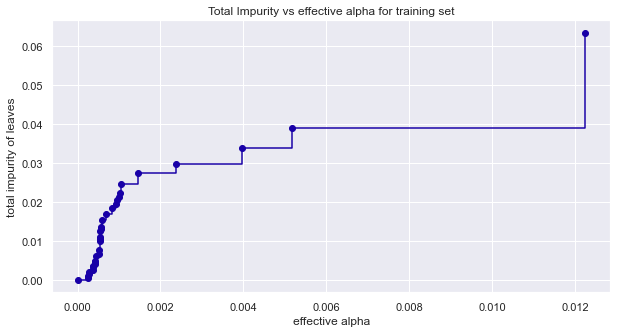

In [106]:
# Plot below graph
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Observations**
- Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [107]:
clfs = []
for ccp_alpha in ccp_alphas: # for every alpha in cc_alphas
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05206542558865251


**Observations**
- For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

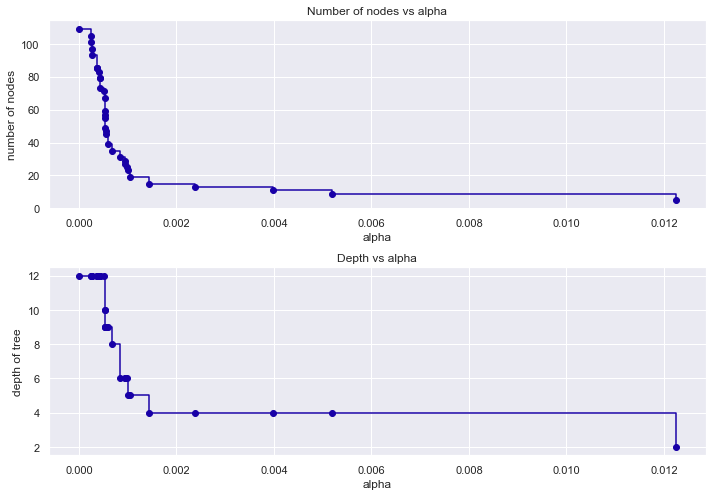

In [108]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Plot below graphs
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [109]:
# Finding train and test accuracy scorings
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

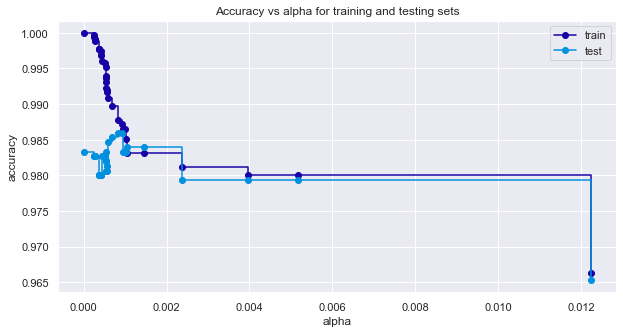

In [110]:
# Plot below graph
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [111]:
# creating the model where we get highest train and test accuracy scores
index_best_model = np.argmax(test_scores) # point to the set of parameters for best model with max scores of test data
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0008340087585370598, random_state=1)
Training accuracy of best model:  0.9877142857142858
Test accuracy of best model:  0.986


**Observations**
With the ccp_alpha tuned towards maximising accuracy scores, The model yielded:
- Accuracy Score training data = 98.77%
- Accuracy Score testing data = 98.60%

#### Since accuracy isn't the right metric for our data we would want high f1 score for our purposes.

In [112]:
# f1 scoring on train data
f1_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.f1_score(y_train,pred_train3)
    f1_train.append(values_train)

In [113]:
# f1 scoring on test data
f1_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.f1_score(y_test,pred_test3)
    f1_test.append(values_test)

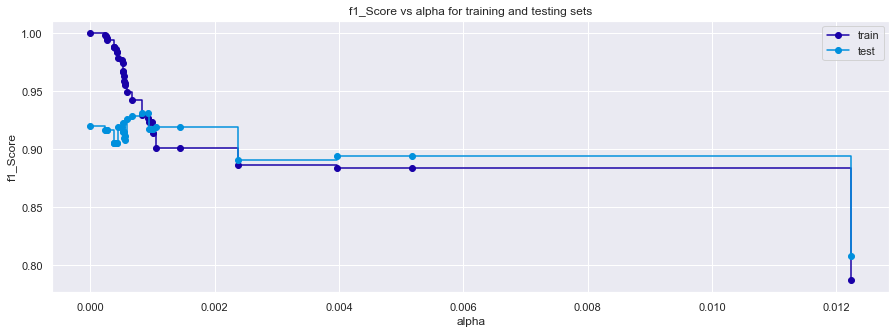

In [114]:
# Plot below graph
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_Score")
ax.set_title("f1_Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [115]:
# creating the model where we get highest train and test f1 score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0008340087585370598, random_state=1)


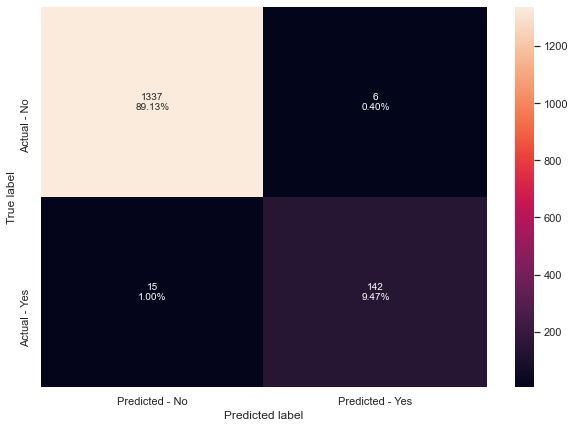

In [116]:
make_confusion_matrix_dTree(best_model,y_test)

In [117]:
# f1 score on train and test
get_f1_score(best_model)

f1 score on training set :  0.9293924466338259
f1 score on test set :  0.9311475409836065


**Observations**
- With post-pruning we get the highest f1 score on both training and test set at 92.94% and 93.11% in Decision Tree Model 3, which is both higher and closer than that of Decision Tree Model 2 using Pre-Pruning Grid Search CV at 90% and 91.9%.

## Visualizing Decision Tree 3

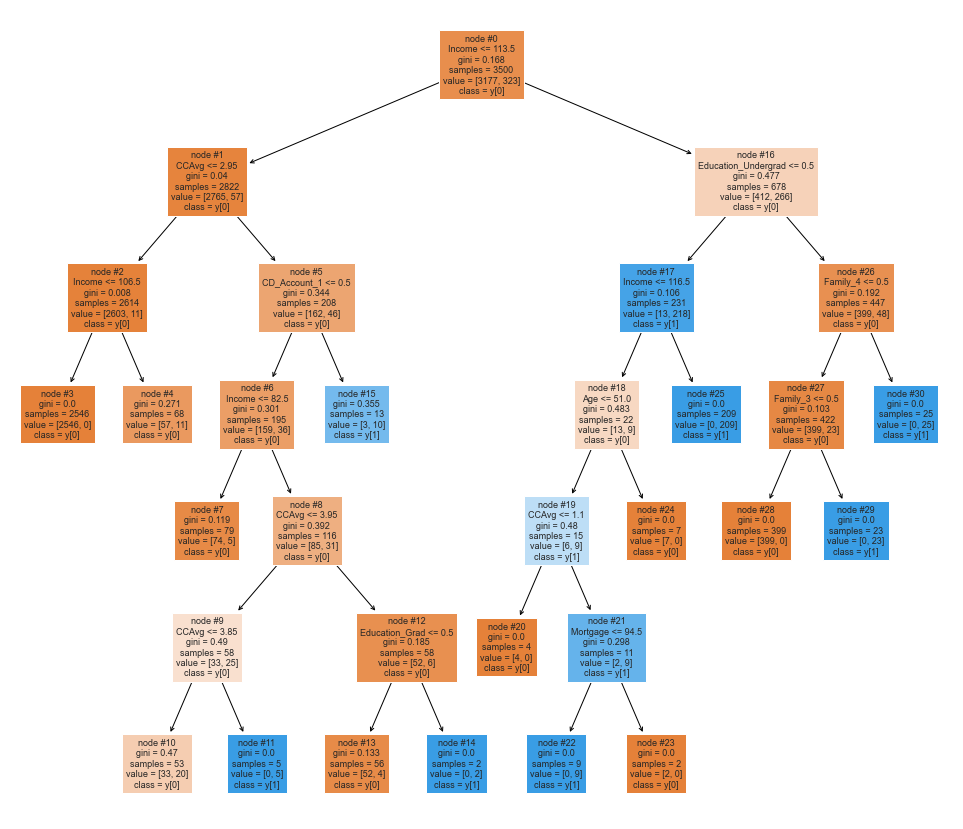

In [118]:
# Plotting a visualization of the tree
plt.figure(figsize=(17,15))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [119]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [57.00, 11.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [74.00, 5.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |--- CCAvg <= 3.85
|   |   |   |   |   |   |--- weights: [33.00, 20.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.85
|   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |--- Education_Grad <= 0.50
|   |   |   |   |   |   |--- weights: [52.00, 4.00] class: 0
|   |   |   |   |   |--- Education_Grad >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  113.50
|   |--- Education_Undergr

In [120]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Education_Undergrad   0.408439
Income                0.331046
Family_3              0.083380
Family_4              0.080898
CCAvg                 0.061021
CD_Account_1          0.015971
Age                   0.006588
Education_Grad        0.006384
Mortgage              0.006274
Experience            0.000000
Family_2              0.000000
Securities_Account_1  0.000000
Online_1              0.000000
CreditCard_1          0.000000


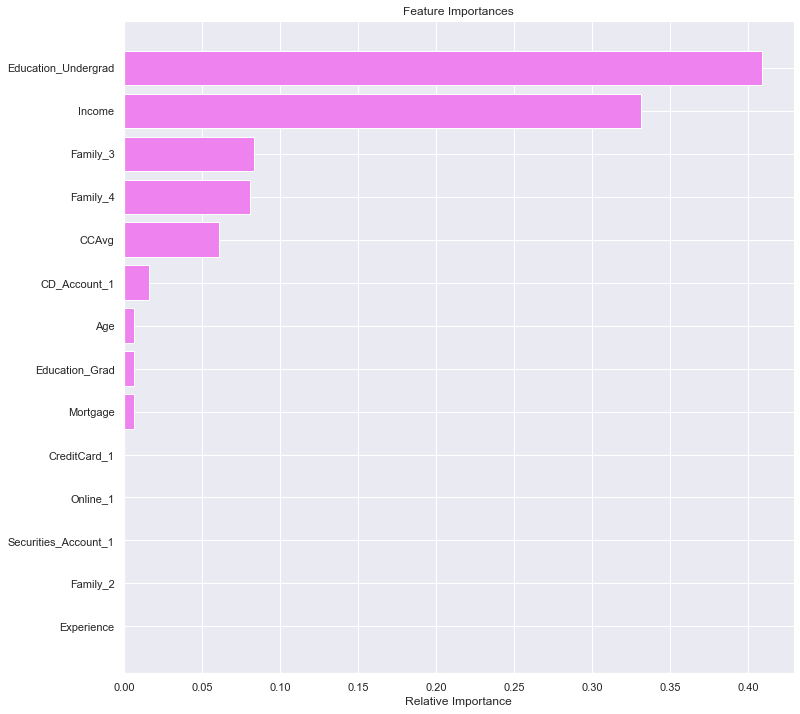

In [121]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
- Education_Undergrad and Income are still the most important variables for predicting the customer personal loan acceptance.
- Beyond CD_Account_1; Age, Education_Grad and Mortgage still have some importance in the model as compared to Decision Tree Model 2 pre-pruned with Grid Search CV.

## Comparing all the decision tree models and logistic regression models

In [122]:
# A consolidated result of all model performances
comparison_frame = pd.DataFrame({'Model':['lg3 model','lg3 model with AUC-ROC curve enhancement','lg3 model with Precision-Recall curve enhancement','Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_f1_Score':[0.7430,0.6825,0.7558,1.00,0.9005,0.9294], 'Test_f1_Score':[0.8071,0.7114,0.8037,0.9196,0.9189,0.9311]}) 
comparison_frame

,Model,Train_f1_Score,Test_f1_Score
0,lg3 model,0.7430,0.8071
1,lg3 model with AUC-ROC curve enhancement,0.6825,0.7114
2,lg3 model with Precision-Recall curve enhancement,0.7558,0.8037
3,Initial decision tree model,1.0000,0.9196
4,Decision treee with hyperparameter tuning,0.9005,0.9189
5,Decision tree with post-pruning,0.9294,0.9311


## Conclusion and Recommendations

- Decision tree with post-pruning is giving the highest f1 score on test set.
- Education_Undergrad and Income are still the most significant variables for predicting the customer personal loan acceptance followed by larger family size of above 2 and credit card spending. 

# EDA on incorrectly predicted data

Only the best model in logistic regression (lg3 model with Precision-Recall curve enhancement) and decision trees (Decision tree with post-pruning) are included for analysis.

## Assembling X_train, X_test, y_train, y_test

### X_train + y_train Dataset

In [123]:
X_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
1840,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0
2115,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0
4437,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0
1146,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0
2486,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0


In [124]:
y_train.head()

1840    0
2115    0
4437    0
1146    0
2486    0
Name: Personal_Loan, dtype: category
Categories (2, int64): [0, 1]

In [125]:
X_train.tail()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
4426,33,8,140,4.6,0,0,0,0,0,1,0,0,1,0
466,25,0,13,0.9,0,1,0,0,0,0,0,0,1,0
3092,43,18,113,0.4,325,1,0,0,0,1,1,0,0,0
3772,35,10,152,3.0,0,1,0,0,0,1,0,0,1,0
860,57,31,30,0.7,145,1,0,0,1,0,0,0,0,0


In [126]:
y_train.tail()

4426    0
466     0
3092    0
3772    0
860     0
Name: Personal_Loan, dtype: category
Categories (2, int64): [0, 1]

In [127]:
y_train = pd.DataFrame (y_train)

In [128]:
# test
y_train['Personal_Loan'].value_counts(dropna=False)

0    3177
1     323
Name: Personal_Loan, dtype: int64

In [129]:
y_train

,Personal_Loan
1840,0
2115,0
4437,0
1146,0
2486,0
...,...
4426,0
466,0
3092,0
3772,0


In [130]:
Xy_train = X_train.join(y_train)

In [131]:
Xy_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan
1840,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0
2115,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0
4437,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0
1146,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0
2486,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0


In [132]:
Xy_train.tail()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan
4426,33,8,140,4.6,0,0,0,0,0,1,0,0,1,0,0
466,25,0,13,0.9,0,1,0,0,0,0,0,0,1,0,0
3092,43,18,113,0.4,325,1,0,0,0,1,1,0,0,0,0
3772,35,10,152,3.0,0,1,0,0,0,1,0,0,1,0,0
860,57,31,30,0.7,145,1,0,0,1,0,0,0,0,0,0


In [133]:
# test
Xy_train['Personal_Loan'].value_counts(dropna=False)

0    3177
1     323
Name: Personal_Loan, dtype: int64

### X_test + y_test Dataset

In [134]:
X_test.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
1501,30,4,35,0.3,0,1,0,0,1,0,1,0,0,1
2586,47,23,149,6.1,0,0,0,1,0,1,0,0,0,1
2653,30,5,121,3.1,408,1,0,0,0,1,0,0,1,0
1055,31,6,62,1.0,0,0,0,0,0,1,1,0,1,0
705,62,36,30,0.7,0,0,1,0,1,0,0,0,1,0


In [135]:
y_test = pd.DataFrame (y_test)
y_test.head()

,Personal_Loan
1501,0
2586,1
2653,0
1055,0
705,0


In [136]:
# test
y_test['Personal_Loan'].value_counts(dropna=False)

0    1343
1     157
Name: Personal_Loan, dtype: int64

In [137]:
Xy_test = X_test.join(y_test)

In [138]:
Xy_test.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan
1501,30,4,35,0.3,0,1,0,0,1,0,1,0,0,1,0
2586,47,23,149,6.1,0,0,0,1,0,1,0,0,0,1,1
2653,30,5,121,3.1,408,1,0,0,0,1,0,0,1,0,0
1055,31,6,62,1.0,0,0,0,0,0,1,1,0,1,0,0
705,62,36,30,0.7,0,0,1,0,1,0,0,0,1,0,0


In [139]:
# test
Xy_test['Personal_Loan'].value_counts(dropna=False)

0    1343
1     157
Name: Personal_Loan, dtype: int64

## Prep LG3 Dataset with predicted values

### LG3 Train Data

In [140]:
Xy_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan
1840,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0
2115,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0
4437,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0
1146,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0
2486,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0


In [141]:
# Put a name to the column because it is a series
pred_train_opt = pd.Series(pred_train_opt, dtype=np.int64, name='Predicted_Values') 

In [142]:
pred_train_opt = pd.DataFrame (pred_train_opt)
pred_train_opt.head()

,Predicted_Values
1840,0
2115,0
4437,0
1146,0
2486,0


In [143]:
# test
pred_train_opt['Predicted_Values'].value_counts(dropna=False)

0    3172
1     328
Name: Predicted_Values, dtype: int64

In [144]:
LG3_Xy_train = Xy_train.join(pred_train_opt)
LG3_Xy_train.head() # LG3 training dataset with predicted values

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
1840,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0
2115,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0
4437,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0
1146,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0
2486,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0


In [145]:
# test
LG3_Xy_train['Predicted_Values'].value_counts(dropna=False)

0    3172
1     328
Name: Predicted_Values, dtype: int64

### LG3 Test Data

In [146]:
Xy_test.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan
1501,30,4,35,0.3,0,1,0,0,1,0,1,0,0,1,0
2586,47,23,149,6.1,0,0,0,1,0,1,0,0,0,1,1
2653,30,5,121,3.1,408,1,0,0,0,1,0,0,1,0,0
1055,31,6,62,1.0,0,0,0,0,0,1,1,0,1,0,0
705,62,36,30,0.7,0,0,1,0,1,0,0,0,1,0,0


In [147]:
# Put a name to the column because it is a series
pred_test_opt = pd.Series(pred_test_opt, dtype=np.int64, name='Predicted_Values') 

In [148]:
pred_test_opt = pd.DataFrame (pred_test_opt)
pred_test_opt.head()

,Predicted_Values
1501,0
2586,0
2653,0
1055,0
705,0


In [149]:
# test
pred_test_opt['Predicted_Values'].value_counts(dropna=False)

0    1331
1     169
Name: Predicted_Values, dtype: int64

In [150]:
LG3_Xy_test = Xy_test.join(pred_test_opt)
LG3_Xy_test.head() # LG3 test dataset with predicted values

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
1501,30,4,35,0.3,0,1,0,0,1,0,1,0,0,1,0,0
2586,47,23,149,6.1,0,0,0,1,0,1,0,0,0,1,1,0
2653,30,5,121,3.1,408,1,0,0,0,1,0,0,1,0,0,0
1055,31,6,62,1.0,0,0,0,0,0,1,1,0,1,0,0,0
705,62,36,30,0.7,0,0,1,0,1,0,0,0,1,0,0,0


In [151]:
# test
LG3_Xy_test['Predicted_Values'].value_counts(dropna=False)

0    1331
1     169
Name: Predicted_Values, dtype: int64

### Combine LG3 Train & Test Data

In [152]:
LG3_data = LG3_Xy_train.append(LG3_Xy_test)
LG3_data.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
1840,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0
2115,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0
4437,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0
1146,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0
2486,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0


In [153]:
LG3_data.tail()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
3563,53,27,139,0.9,0,0,0,0,0,0,0,0,0,0,1,1
1538,55,30,34,0.1,157,0,0,1,0,0,0,0,1,0,0,0
1837,43,18,103,1.0,180,0,1,0,0,1,0,0,1,1,0,0
2380,40,16,50,0.6,0,1,0,0,0,0,0,0,0,0,0,0
1912,42,16,191,4.8,0,0,1,0,1,0,1,1,1,0,1,1


In [154]:
# test
LG3_Xy_train['Predicted_Values'].value_counts(dropna=False)

0    3172
1     328
Name: Predicted_Values, dtype: int64

In [155]:
# test
LG3_Xy_test['Predicted_Values'].value_counts(dropna=False)

0    1331
1     169
Name: Predicted_Values, dtype: int64

In [156]:
# test
LG3_data['Predicted_Values'].value_counts(dropna=False)

0    4503
1     497
Name: Predicted_Values, dtype: int64

In [157]:
LG3_data = LG3_data.reset_index(drop=True)

In [158]:
LG3_data.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
0,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0
1,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0
2,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0
3,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0
4,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0


In [159]:
LG3_data.tail()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
4995,53,27,139,0.9,0,0,0,0,0,0,0,0,0,0,1,1
4996,55,30,34,0.1,157,0,0,1,0,0,0,0,1,0,0,0
4997,43,18,103,1.0,180,0,1,0,0,1,0,0,1,1,0,0
4998,40,16,50,0.6,0,1,0,0,0,0,0,0,0,0,0,0
4999,42,16,191,4.8,0,0,1,0,1,0,1,1,1,0,1,1


## Prep DT Dataset with predicted values

### DT Train Data

In [160]:
Xy_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan
1840,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0
2115,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0
4437,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0
1146,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0
2486,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0


In [161]:
# Put a name to the column different from LG3 treatment because it starts as an array
pred_train3 = pd.DataFrame(pred_train3, columns=['Predicted_Values'])

In [162]:
pred_train3.head()

,Predicted_Values
0,0
1,0
2,0
3,0
4,0


In [163]:
# test
pred_train3['Predicted_Values'].value_counts(dropna=False)

0    3269
1     231
Name: Predicted_Values, dtype: int64

In [164]:
# reseting the index numbers to match predicted values
Xy_train1 = Xy_train.reset_index(drop=True)

In [165]:
DT_Xy_train = Xy_train1.join(pred_train3)
DT_Xy_train.head() # DT training dataset with predicted values

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
0,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0
1,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0
2,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0
3,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0
4,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0


In [166]:
# test
DT_Xy_train['Predicted_Values'].value_counts(dropna=False)

0    3269
1     231
Name: Predicted_Values, dtype: int64

### DT Test Data

In [167]:
Xy_test.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan
1501,30,4,35,0.3,0,1,0,0,1,0,1,0,0,1,0
2586,47,23,149,6.1,0,0,0,1,0,1,0,0,0,1,1
2653,30,5,121,3.1,408,1,0,0,0,1,0,0,1,0,0
1055,31,6,62,1.0,0,0,0,0,0,1,1,0,1,0,0
705,62,36,30,0.7,0,0,1,0,1,0,0,0,1,0,0


In [168]:
# Put a name to the column different from LG3 treatment because it starts as an array
pred_test3 = pd.DataFrame(pred_test3, columns=['Predicted_Values'])

In [169]:
pred_test3.head()

,Predicted_Values
0,0
1,0
2,0
3,0
4,0


In [170]:
# test
pred_test3['Predicted_Values'].value_counts(dropna=False)

0    1387
1     113
Name: Predicted_Values, dtype: int64

In [171]:
# reseting the index numbers to match predicted values
Xy_test1 = Xy_test.reset_index(drop=True)

In [172]:
DT_Xy_test = Xy_test1.join(pred_test3)
DT_Xy_test.head() # DT training dataset with predicted values

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
0,30,4,35,0.3,0,1,0,0,1,0,1,0,0,1,0,0
1,47,23,149,6.1,0,0,0,1,0,1,0,0,0,1,1,0
2,30,5,121,3.1,408,1,0,0,0,1,0,0,1,0,0,0
3,31,6,62,1.0,0,0,0,0,0,1,1,0,1,0,0,0
4,62,36,30,0.7,0,0,1,0,1,0,0,0,1,0,0,0


In [173]:
# test
DT_Xy_test['Predicted_Values'].value_counts(dropna=False)

0    1387
1     113
Name: Predicted_Values, dtype: int64

### Combine DT Train & Test Data

In [174]:
DT_data = DT_Xy_train.append(DT_Xy_test)

In [175]:
DT_data = DT_data.reset_index(drop=True)

In [176]:
DT_data.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
0,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0
1,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0
2,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0
3,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0
4,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0


In [177]:
DT_data.tail()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values
4995,53,27,139,0.9,0,0,0,0,0,0,0,0,0,0,1,1
4996,55,30,34,0.1,157,0,0,1,0,0,0,0,1,0,0,0
4997,43,18,103,1.0,180,0,1,0,0,1,0,0,1,1,0,0
4998,40,16,50,0.6,0,1,0,0,0,0,0,0,0,0,0,0
4999,42,16,191,4.8,0,0,1,0,1,0,1,1,1,0,1,1


In [178]:
# test
DT_Xy_train['Predicted_Values'].value_counts(dropna=False)

0    3269
1     231
Name: Predicted_Values, dtype: int64

In [179]:
# test
DT_Xy_test['Predicted_Values'].value_counts(dropna=False)

0    1387
1     113
Name: Predicted_Values, dtype: int64

In [180]:
# test
DT_data['Predicted_Values'].value_counts(dropna=False)

0    4656
1     344
Name: Predicted_Values, dtype: int64

## Add to Datasets with label for different predictions

### LG Model

In [181]:
LG3_data['Different Predictions'] = ''
LG3_data['Different Predictions'] = 0

In [182]:
LG3_data.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values,Different Predictions
0,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0,0
1,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0,0
2,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0,0
3,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0,0
4,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0,0


In [183]:
LG3_data.loc[((LG3_data["Personal_Loan"] == 0) & (LG3_data["Predicted_Values"] == 1)) | ((LG3_data["Personal_Loan"] == 1) & (LG3_data["Predicted_Values"] == 0)),'Different Predictions'] = 1

In [184]:
LG3_data.head(10)

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values,Different Predictions
0,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0,0
1,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0,0
2,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0,0
3,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0,0
4,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0,0
5,46,20,104,5.7,0,0,0,0,0,1,0,0,1,1,0,0,0
6,32,8,45,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0
7,36,10,80,2.2,0,0,0,1,1,0,0,0,1,0,0,0,0
8,58,32,130,2.7,0,1,0,0,0,1,0,0,1,0,0,0,0
9,54,29,34,0.1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [185]:
LG3_data.tail(10)

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values,Different Predictions
4990,40,16,44,1.8,0,0,0,0,0,1,1,0,1,0,0,0,0
4991,29,3,148,4.1,0,0,1,0,0,1,0,0,1,0,1,0,1
4992,64,40,63,1.2,0,0,0,1,1,0,0,0,1,0,0,0,0
4993,38,13,191,3.0,0,1,0,0,0,1,0,0,1,0,0,1,1
4994,44,20,101,4.4,82,0,1,0,1,0,0,0,0,0,1,1,0
4995,53,27,139,0.9,0,0,0,0,0,0,0,0,0,0,1,1,0
4996,55,30,34,0.1,157,0,0,1,0,0,0,0,1,0,0,0,0
4997,43,18,103,1.0,180,0,1,0,0,1,0,0,1,1,0,0,0
4998,40,16,50,0.6,0,1,0,0,0,0,0,0,0,0,0,0,0
4999,42,16,191,4.8,0,0,1,0,1,0,1,1,1,0,1,1,0


In [186]:
LG3_data['Different Predictions'].value_counts(dropna=False)

0    4777
1     223
Name: Different Predictions, dtype: int64

### DT Model

In [187]:
DT_data['Different Predictions'] = ''
DT_data['Different Predictions'] = 0

In [188]:
DT_data.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values,Different Predictions
0,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0,0
1,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0,0
2,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0,0
3,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0,0
4,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0,0


In [189]:
DT_data.loc[((DT_data["Personal_Loan"] == 0) & (DT_data["Predicted_Values"] == 1)) | ((DT_data["Personal_Loan"] == 1) & (DT_data["Predicted_Values"] == 0)),'Different Predictions'] = 1

In [190]:
DT_data.head(10)

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values,Different Predictions
0,55,25,23,0.4,88,0,0,1,0,0,0,0,0,0,0,0,0
1,57,31,30,1.4,0,0,1,0,0,1,0,0,0,0,0,0,0
2,63,38,63,1.5,0,1,0,0,0,1,0,0,1,0,0,0,0
3,31,7,71,0.1,78,0,0,0,0,1,1,0,0,0,0,0,0
4,61,36,130,1.3,257,0,0,0,0,1,0,0,0,0,0,0,0
5,46,20,104,5.7,0,0,0,0,0,1,0,0,1,1,0,0,0
6,32,8,45,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0
7,36,10,80,2.2,0,0,0,1,1,0,0,0,1,0,0,0,0
8,58,32,130,2.7,0,1,0,0,0,1,0,0,1,0,0,0,0
9,54,29,34,0.1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [191]:
DT_data.tail(10)

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Grad,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predicted_Values,Different Predictions
4990,40,16,44,1.8,0,0,0,0,0,1,1,0,1,0,0,0,0
4991,29,3,148,4.1,0,0,1,0,0,1,0,0,1,0,1,0,1
4992,64,40,63,1.2,0,0,0,1,1,0,0,0,1,0,0,0,0
4993,38,13,191,3.0,0,1,0,0,0,1,0,0,1,0,0,0,0
4994,44,20,101,4.4,82,0,1,0,1,0,0,0,0,0,1,0,1
4995,53,27,139,0.9,0,0,0,0,0,0,0,0,0,0,1,1,0
4996,55,30,34,0.1,157,0,0,1,0,0,0,0,1,0,0,0,0
4997,43,18,103,1.0,180,0,1,0,0,1,0,0,1,1,0,0,0
4998,40,16,50,0.6,0,1,0,0,0,0,0,0,0,0,0,0,0
4999,42,16,191,4.8,0,0,1,0,1,0,1,1,1,0,1,1,0


In [192]:
DT_data['Different Predictions'].value_counts(dropna=False)

0    4830
1     170
Name: Different Predictions, dtype: int64

## EDA on LG3 Model

In [193]:
def histogram_boxplot_smaller(feature, figsize=(6, 3), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

In [194]:
LG3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    5000 non-null   int64   
 1   Experience             5000 non-null   int64   
 2   Income                 5000 non-null   int64   
 3   CCAvg                  5000 non-null   float64 
 4   Mortgage               5000 non-null   int64   
 5   Family_2               5000 non-null   uint8   
 6   Family_3               5000 non-null   uint8   
 7   Family_4               5000 non-null   uint8   
 8   Education_Grad         5000 non-null   uint8   
 9   Education_Undergrad    5000 non-null   uint8   
 10  Securities_Account_1   5000 non-null   uint8   
 11  CD_Account_1           5000 non-null   uint8   
 12  Online_1               5000 non-null   uint8   
 13  CreditCard_1           5000 non-null   uint8   
 14  Personal_Loan          5000 non-null   c

In [195]:
LG3_data["Family_2"] = LG3_data["Family_2"].astype("category")
LG3_data["Family_3"] = LG3_data["Family_3"].astype("category")
LG3_data["Family_4"] = LG3_data["Family_4"].astype("category")
LG3_data["Education_Grad"] = LG3_data["Education_Grad"].astype("category")
LG3_data["Education_Undergrad"] = LG3_data["Education_Undergrad"].astype("category")
LG3_data["Securities_Account_1"] = LG3_data["Securities_Account_1"].astype("category")
LG3_data["CD_Account_1"] = LG3_data["CD_Account_1"].astype("category")
LG3_data["Online_1"] = LG3_data["Online_1"].astype("category")
LG3_data["CreditCard_1"] = LG3_data["CreditCard_1"].astype("category")
LG3_data["Different Predictions"] = LG3_data["Different Predictions"].astype("category")

In [196]:
LG3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    5000 non-null   int64   
 1   Experience             5000 non-null   int64   
 2   Income                 5000 non-null   int64   
 3   CCAvg                  5000 non-null   float64 
 4   Mortgage               5000 non-null   int64   
 5   Family_2               5000 non-null   category
 6   Family_3               5000 non-null   category
 7   Family_4               5000 non-null   category
 8   Education_Grad         5000 non-null   category
 9   Education_Undergrad    5000 non-null   category
 10  Securities_Account_1   5000 non-null   category
 11  CD_Account_1           5000 non-null   category
 12  Online_1               5000 non-null   category
 13  CreditCard_1           5000 non-null   category
 14  Personal_Loan          5000 non-null   c

In [197]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, LG3_data["Different Predictions"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, LG3_data["Different Predictions"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(6, 3))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

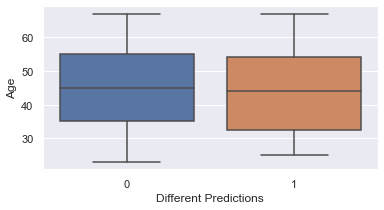

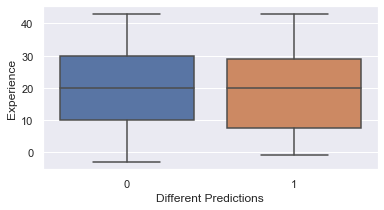

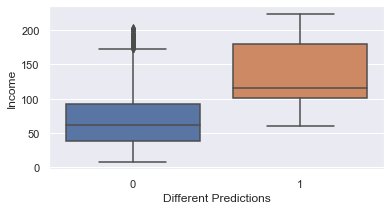

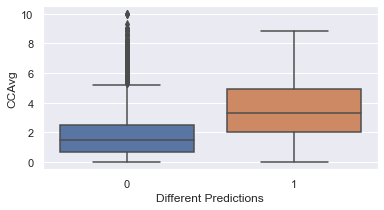

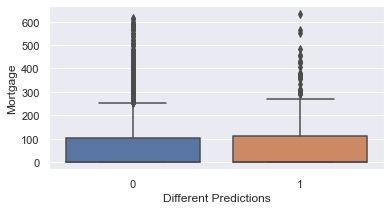

In [198]:
sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="Age", data=LG3_data, orient="vertical")
plt.show()

sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="Experience", data=LG3_data, orient="vertical")
plt.show()

sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="Income", data=LG3_data, orient="vertical")
plt.show()

sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="CCAvg", data=LG3_data, orient="vertical")
plt.show()

sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="Mortgage", data=LG3_data, orient="vertical")
plt.show()

***Observations***
- Missed predictions tend to be of higher income and credit card spending ranges.

Different Predictions     0    1   All
Family_2                              
0                      3544  160  3704
1                      1233   63  1296
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


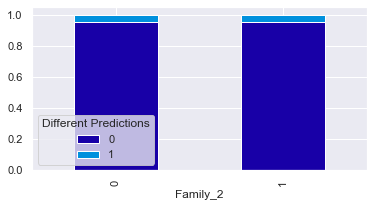

Different Predictions     0    1   All
Family_3                              
0                      3805  185  3990
1                       972   38  1010
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


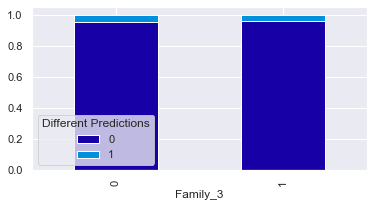

Different Predictions     0    1   All
Family_4                              
0                      3614  164  3778
1                      1163   59  1222
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


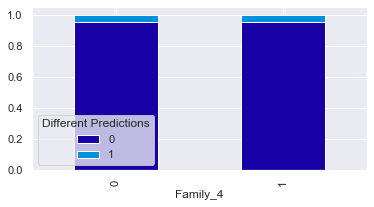

In [199]:
stacked_plot(LG3_data["Family_2"])
stacked_plot(LG3_data["Family_3"])
stacked_plot(LG3_data["Family_4"])

Different Predictions     0    1   All
Education_Undergrad                   
0                      2799  105  2904
1                      1978  118  2096
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


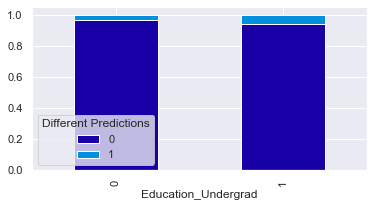

Different Predictions     0    1   All
Education_Grad                        
0                      3422  175  3597
1                      1355   48  1403
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


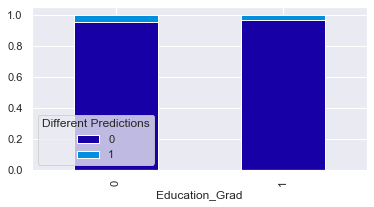

In [200]:
stacked_plot(LG3_data["Education_Undergrad"])
stacked_plot(LG3_data["Education_Grad"])

Different Predictions     0    1   All
Securities_Account_1                  
0                      4279  199  4478
1                       498   24   522
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


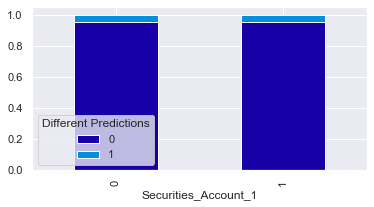

Different Predictions     0    1   All
CD_Account_1                          
0                      4509  189  4698
1                       268   34   302
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


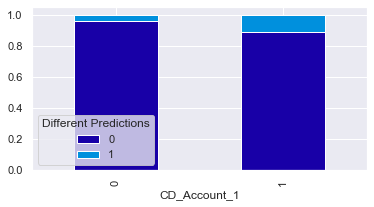

Different Predictions     0    1   All
Online_1                              
0                      1907  109  2016
1                      2870  114  2984
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


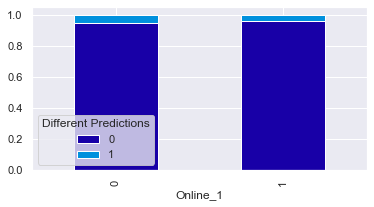

Different Predictions     0    1   All
CreditCard_1                          
0                      3368  162  3530
1                      1409   61  1470
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


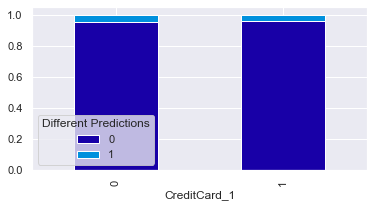

In [201]:
stacked_plot(LG3_data["Securities_Account_1"])
stacked_plot(LG3_data["CD_Account_1"])
stacked_plot(LG3_data["Online_1"])
stacked_plot(LG3_data["CreditCard_1"])

***Obsevations***
- Missed predictions tend to be those with CD_Accounts(about 10% miss) and Undergrad customers (about 5% miss).

## EDA on DT Model

In [202]:
DT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    5000 non-null   int64   
 1   Experience             5000 non-null   int64   
 2   Income                 5000 non-null   int64   
 3   CCAvg                  5000 non-null   float64 
 4   Mortgage               5000 non-null   int64   
 5   Family_2               5000 non-null   uint8   
 6   Family_3               5000 non-null   uint8   
 7   Family_4               5000 non-null   uint8   
 8   Education_Grad         5000 non-null   uint8   
 9   Education_Undergrad    5000 non-null   uint8   
 10  Securities_Account_1   5000 non-null   uint8   
 11  CD_Account_1           5000 non-null   uint8   
 12  Online_1               5000 non-null   uint8   
 13  CreditCard_1           5000 non-null   uint8   
 14  Personal_Loan          5000 non-null   c

In [203]:
DT_data["Family_2"] = DT_data["Family_2"].astype("category")
DT_data["Family_3"] = DT_data["Family_3"].astype("category")
DT_data["Family_4"] = DT_data["Family_4"].astype("category")
DT_data["Education_Grad"] = DT_data["Education_Grad"].astype("category")
DT_data["Education_Undergrad"] = DT_data["Education_Undergrad"].astype("category")
DT_data["Securities_Account_1"] = DT_data["Securities_Account_1"].astype("category")
DT_data["CD_Account_1"] = DT_data["CD_Account_1"].astype("category")
DT_data["Online_1"] = DT_data["Online_1"].astype("category")
DT_data["CreditCard_1"] = DT_data["CreditCard_1"].astype("category")
DT_data["Different Predictions"] = DT_data["Different Predictions"].astype("category")

In [204]:
DT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    5000 non-null   int64   
 1   Experience             5000 non-null   int64   
 2   Income                 5000 non-null   int64   
 3   CCAvg                  5000 non-null   float64 
 4   Mortgage               5000 non-null   int64   
 5   Family_2               5000 non-null   category
 6   Family_3               5000 non-null   category
 7   Family_4               5000 non-null   category
 8   Education_Grad         5000 non-null   category
 9   Education_Undergrad    5000 non-null   category
 10  Securities_Account_1   5000 non-null   category
 11  CD_Account_1           5000 non-null   category
 12  Online_1               5000 non-null   category
 13  CreditCard_1           5000 non-null   category
 14  Personal_Loan          5000 non-null   c

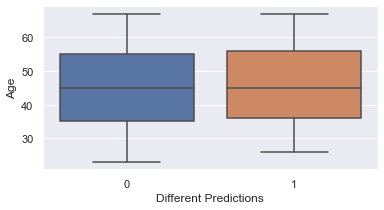

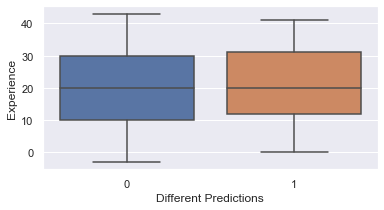

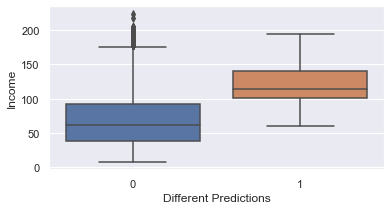

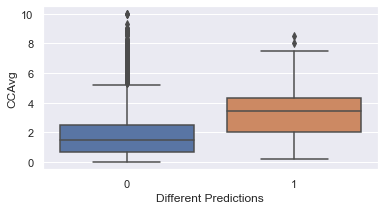

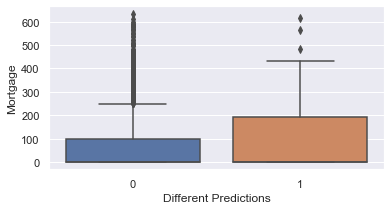

In [205]:
sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="Age", data=DT_data, orient="vertical")
plt.show()

sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="Experience", data=DT_data, orient="vertical")
plt.show()

sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="Income", data=DT_data, orient="vertical")
plt.show()

sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="CCAvg", data=DT_data, orient="vertical")
plt.show()

sns.set(rc={"figure.figsize": (6, 3)})
sns.boxplot(x="Different Predictions", y="Mortgage", data=DT_data, orient="vertical")
plt.show()

***Obsevations***
- Missed predictions tend to be of higher income, credit card spending ranges and higher mortgages.

Different Predictions     0    1   All
Family_2                              
0                      3544  160  3704
1                      1233   63  1296
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


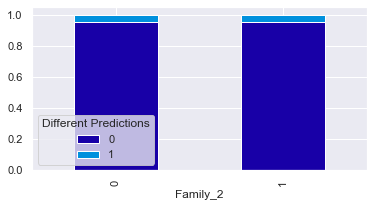

Different Predictions     0    1   All
Family_3                              
0                      3805  185  3990
1                       972   38  1010
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


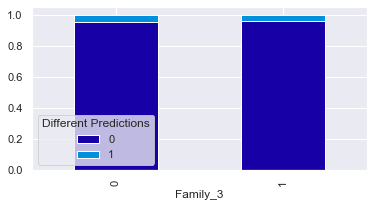

Different Predictions     0    1   All
Family_4                              
0                      3614  164  3778
1                      1163   59  1222
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


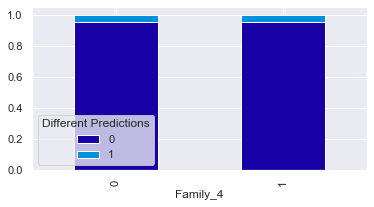

In [206]:
stacked_plot(DT_data["Family_2"])
stacked_plot(DT_data["Family_3"])
stacked_plot(DT_data["Family_4"])

Different Predictions     0    1   All
Education_Undergrad                   
0                      2799  105  2904
1                      1978  118  2096
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


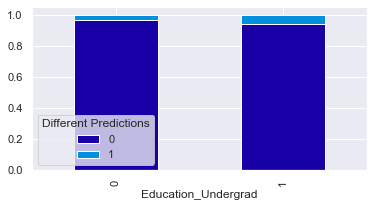

Different Predictions     0    1   All
Education_Grad                        
0                      3422  175  3597
1                      1355   48  1403
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


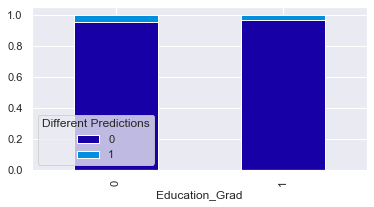

In [207]:
stacked_plot(DT_data["Education_Undergrad"])
stacked_plot(DT_data["Education_Grad"])

Different Predictions     0    1   All
Securities_Account_1                  
0                      4279  199  4478
1                       498   24   522
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


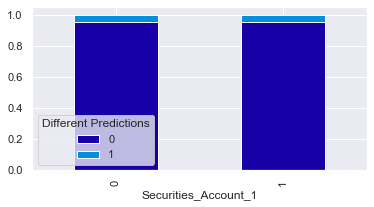

Different Predictions     0    1   All
CD_Account_1                          
0                      4509  189  4698
1                       268   34   302
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


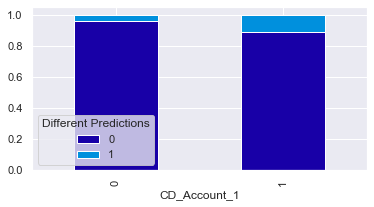

Different Predictions     0    1   All
Online_1                              
0                      1907  109  2016
1                      2870  114  2984
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


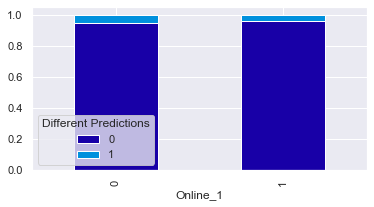

Different Predictions     0    1   All
CreditCard_1                          
0                      3368  162  3530
1                      1409   61  1470
All                    4777  223  5000
------------------------------------------------------------------------------------------------------------------------


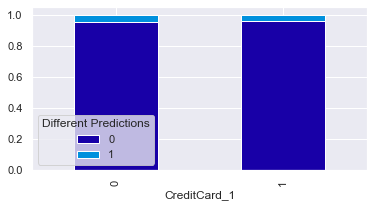

In [208]:
stacked_plot(DT_data["Securities_Account_1"])
stacked_plot(DT_data["CD_Account_1"])
stacked_plot(DT_data["Online_1"])
stacked_plot(DT_data["CreditCard_1"])

***Obsevations***
- Missed predictions tend to be those with CD_Accounts(about 10% miss) and Undergrad customers (about 5% miss).

## Conclusion

- Missed predictions tend to be of higher income and credit card spending ranges with decision tree model including the factor of higher mortage values.
- Missed predictions tend to be those with CD_Accounts(about 10% miss) and Undergrad customers (about 5% miss for both models.